In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import scipy
import scipy.cluster.hierarchy as sch
from kmodes.kmodes import KModes
import matplotlib.cm as cm
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
df_v3 = pd.read_csv("./Data/version_3_non_num_cld.csv", index_col = "Unnamed: 0")

In [20]:
df_v3['PTYIDEO7'].value_counts()

Liberal Democrats            836
Mod/Conserv. Democrats       691
Conservative Republicans     618
Moderate Independents        548
Mod./Liberal Republicans     336
Liberal Independents         242
Conservative Independents    199
Name: PTYIDEO7, dtype: int64

### Separating Different Subgroups 


In [17]:
df_v3_lib_dems = df_v3[df_v3['PTYIDEO7'] == 'Liberal Democrats']
df_v3_mod_con_dems = df_v3[df_v3['PTYIDEO7'] == 'Mod/Conserv. Democrats']
df_v3_lib_ind = df_v3[df_v3['PTYIDEO7'] == 'Liberal Independents']
df_v3_mod_lib_rep = df_v3[df_v3['PTYIDEO7'] == 'Mod./Liberal Republicans']
df_v3_con_rep = df_v3[df_v3['PTYIDEO7'] == 'Conservative Republicans']
df_v3_con_ind = df_v3[df_v3['PTYIDEO7'] == 'Conservative Independents']
df_v3_mod_ind = df_v3[df_v3['PTYIDEO7'] == 'Moderate Independents']
df_v3_all_ind = pd.concat([df_v3_con_ind, df_v3_mod_ind, df_v3_lib_ind])

In [18]:
group_age_by_race = df_v3['AGEBYRACE'].unique()
group_age_by_race = sorted(group_age_by_race, reverse=True)

group_party_by_race = df_v3['PARTYBYRACE'].unique()
group_party_by_race = sorted(group_party_by_race, reverse=True)

group_parents = df_v3['PARENTS'].unique()
group_parents = sorted(group_parents, reverse=True)

group_married = df_v3['MARRIED'].unique()
group_married = sorted(group_married, reverse=True)



In [19]:
def chart_simplifier(df, group, filt, issue):
    plt.figure(figsize=(16, 50))
    for i, g in enumerate(group):
    
        plt.subplot(7, 4, i+1)
        data = df[df[filt]==g][issue].value_counts(normalize=True)
        plt.bar(x=data.index, height=data)
        plt.xticks(rotation=90)
        plt.title(g, fontdict={'fontsize': 20})
        plt.tick_params(axis='x', which='major', labelsize= 15)
        plt.tick_params(axis='y', labelsize=15)
        plt.tight_layout()

### Full Data  

### Four Plots 
#### 1. Plot describing whether or not the participant thinks having women in office is important
#### 2. Plot describing if the participant thinks sexual harassment is a big issue 
#### 3. Plot describing how parents and childless people approve of Trump
#### 4. Plot describing the participants thoughts on gun control by race. 

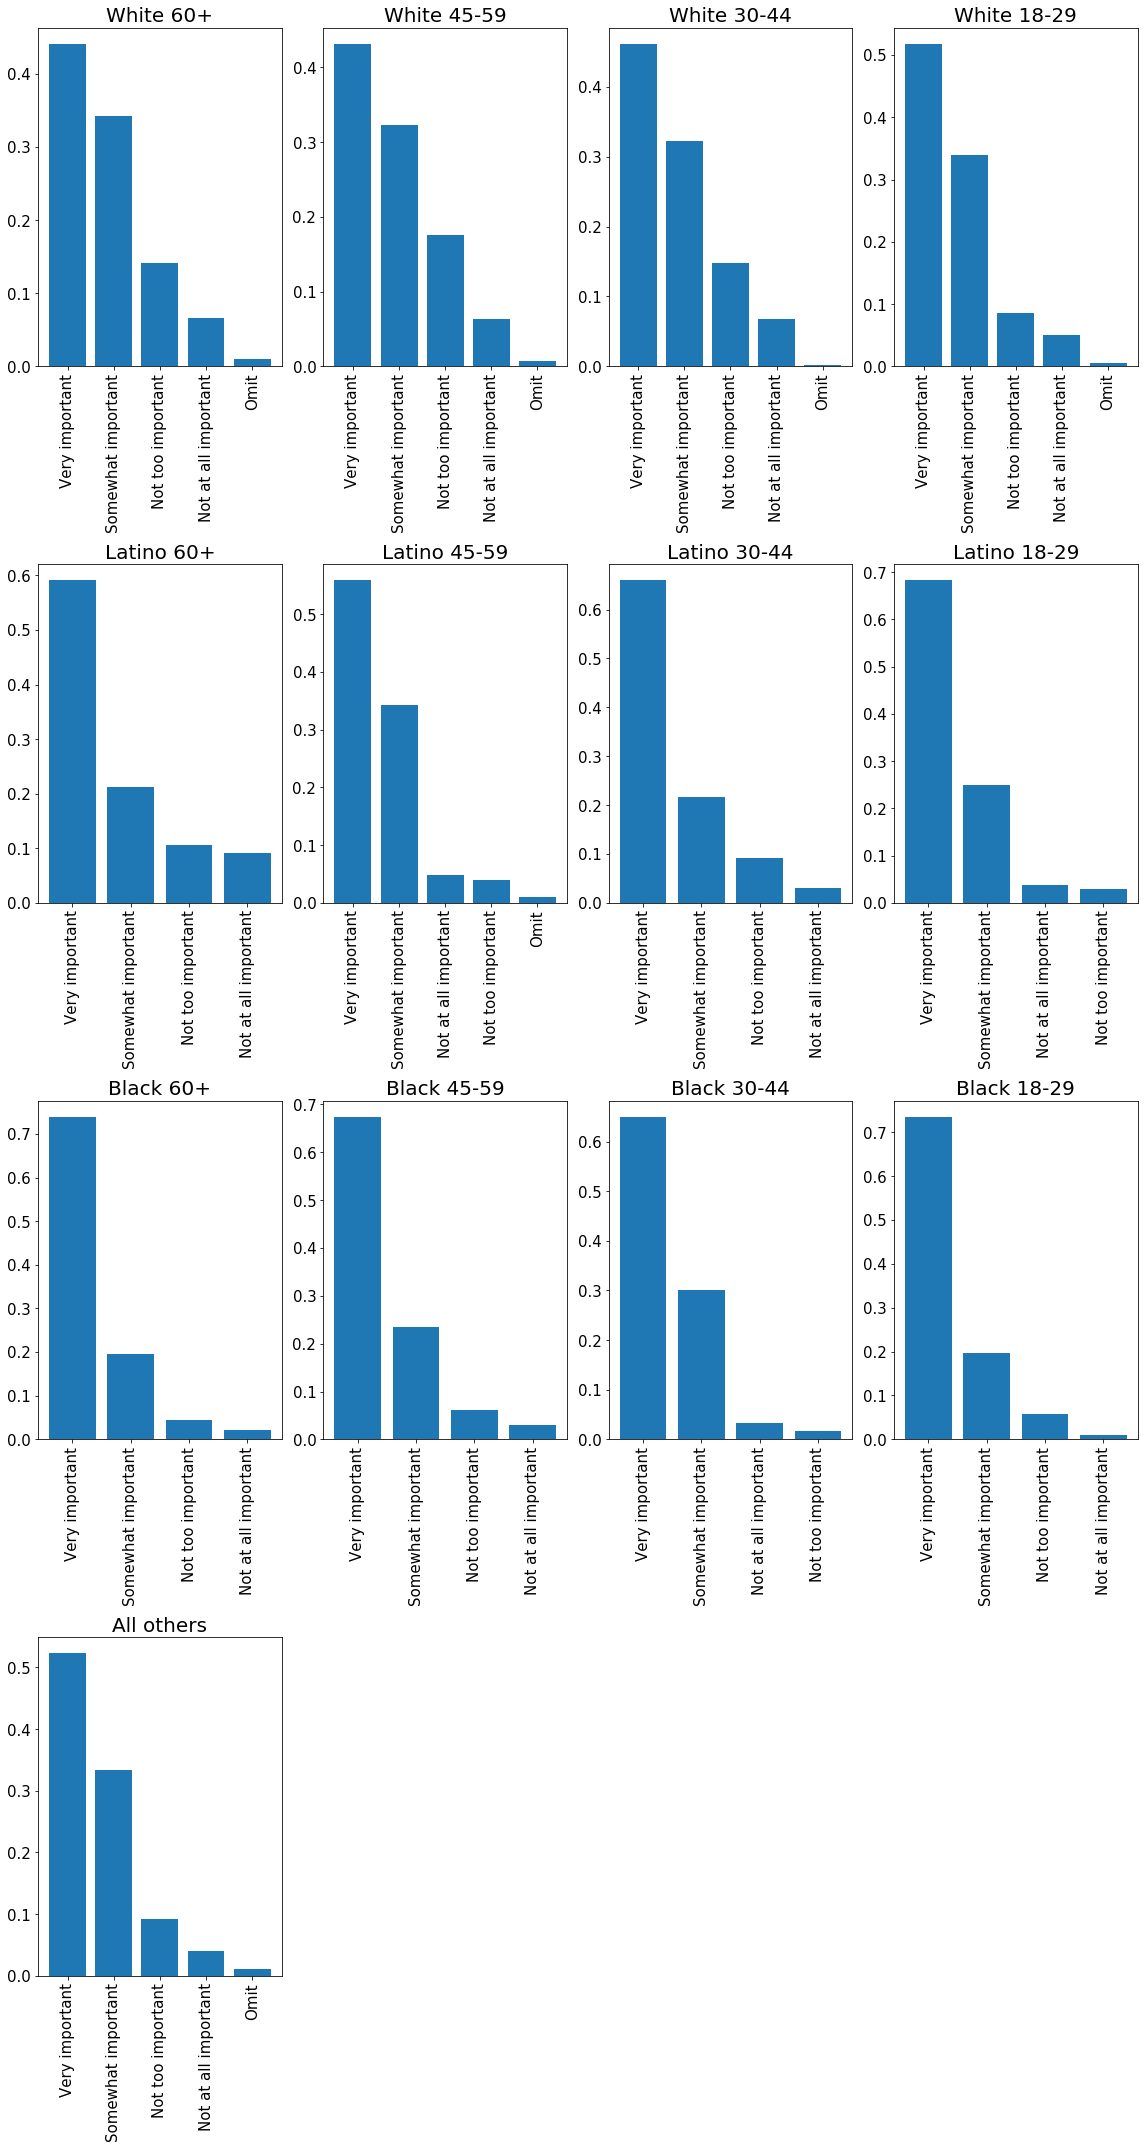

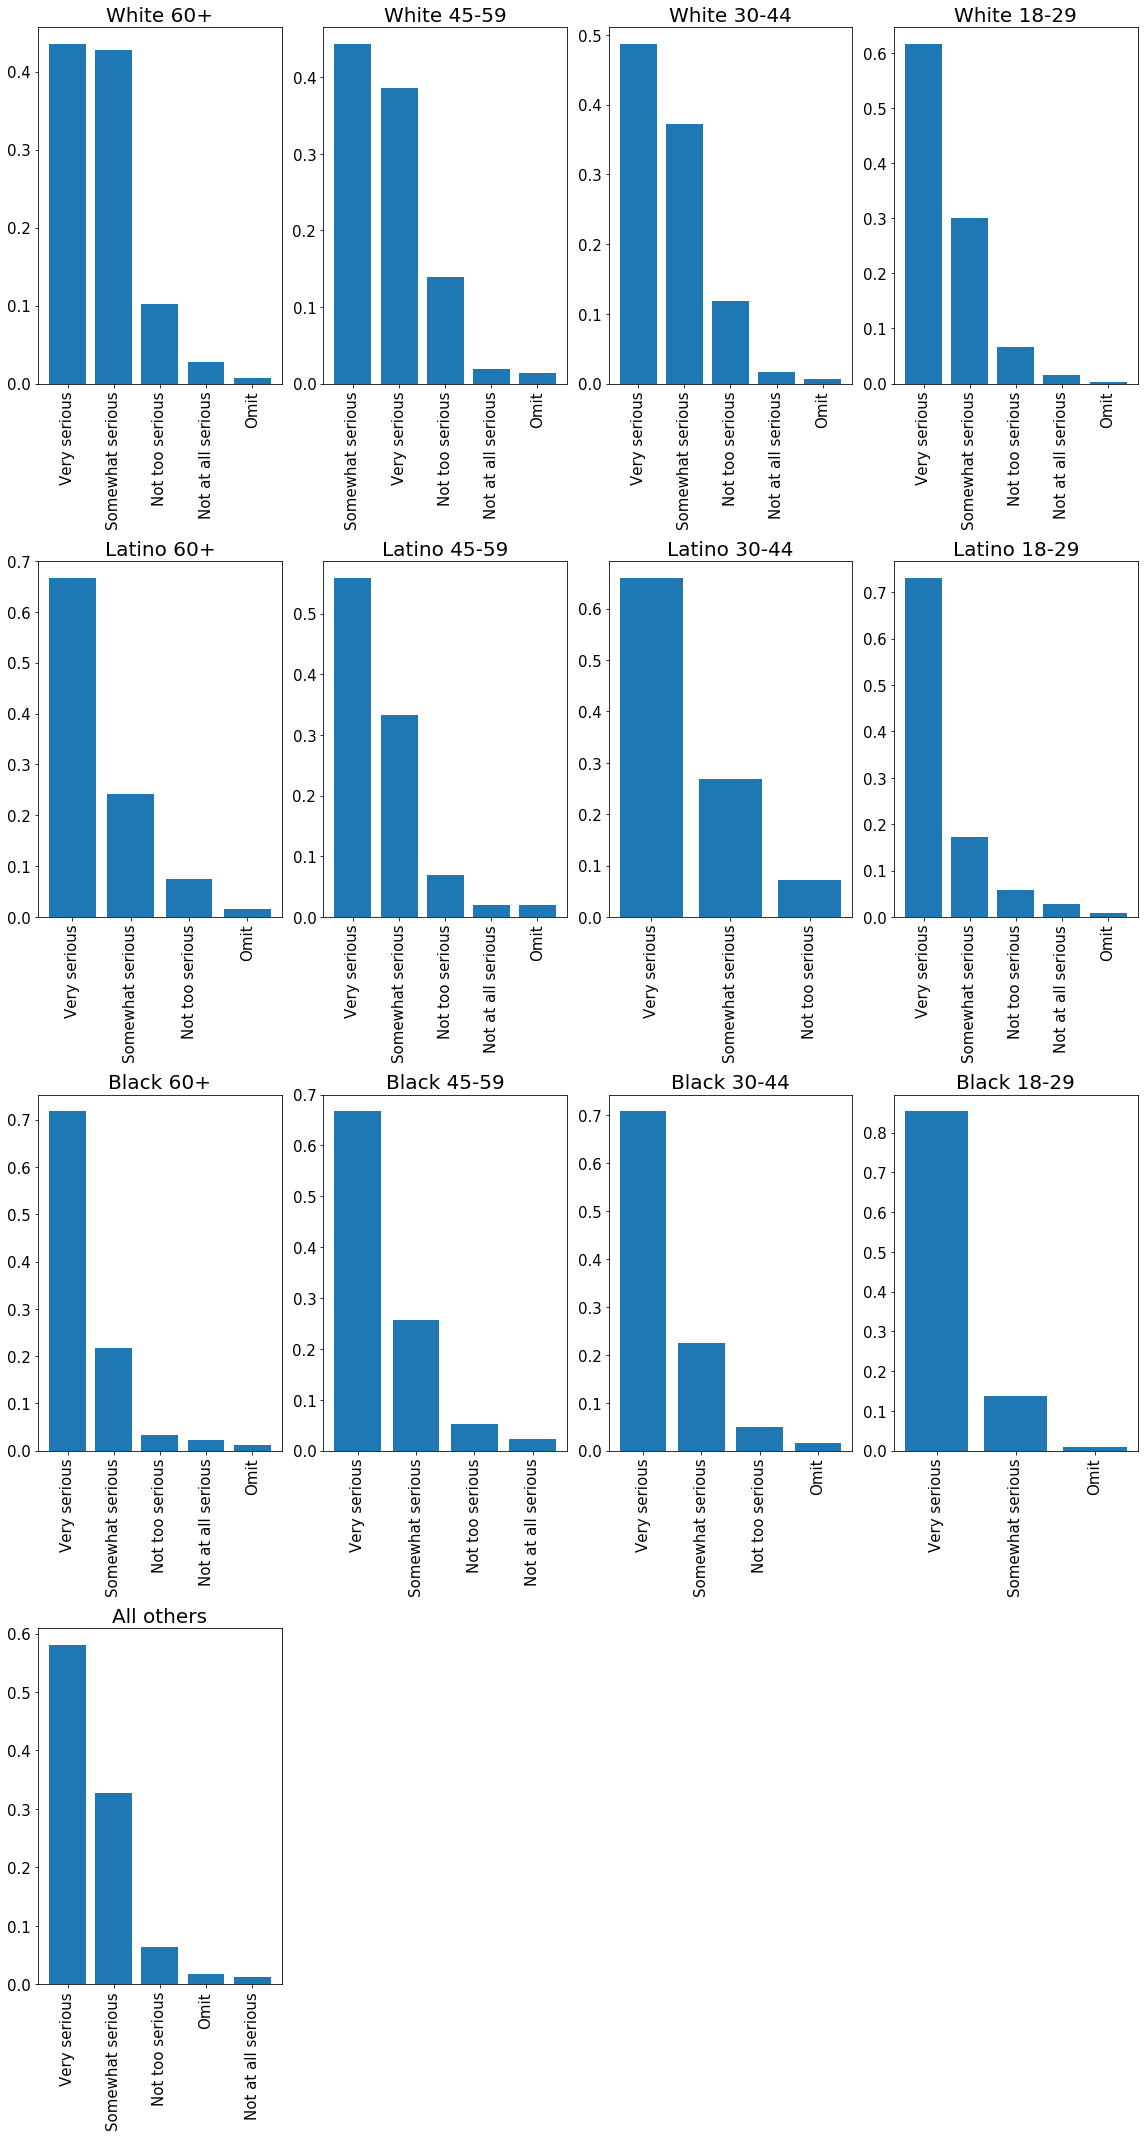

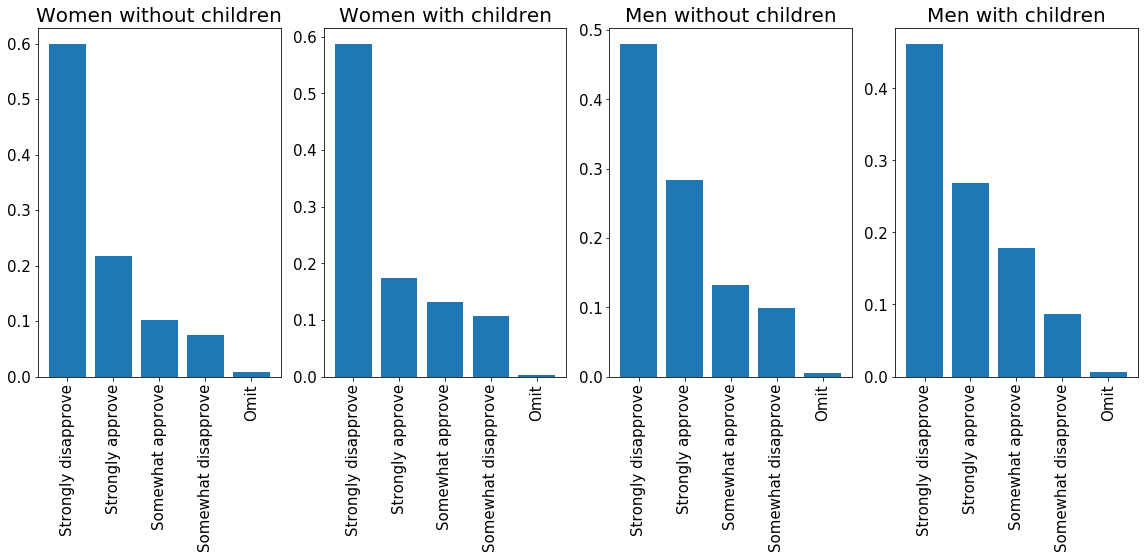

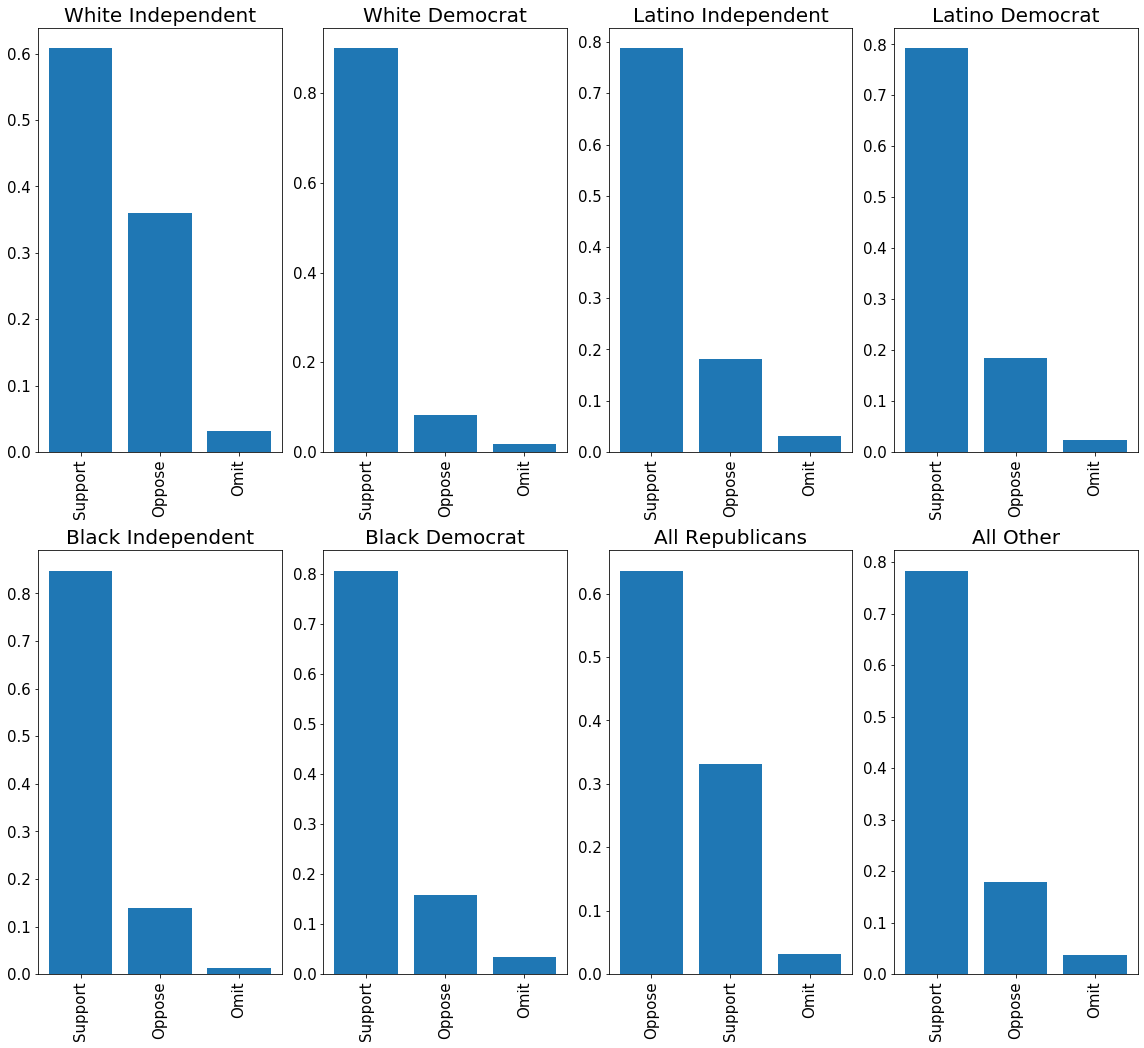

In [21]:
chart_simplifier(df_v3, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'WOMEN' )
chart_simplifier(df_v3, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'SEXUALHARASS' )
chart_simplifier(df_v3, group = group_parents, filt = 'PARENTS', issue = 'TRUMP4' )
chart_simplifier(df_v3, group = group_party_by_race, filt = 'PARTYBYRACE', issue = 'GUN16' )




### Liberal Democrats  

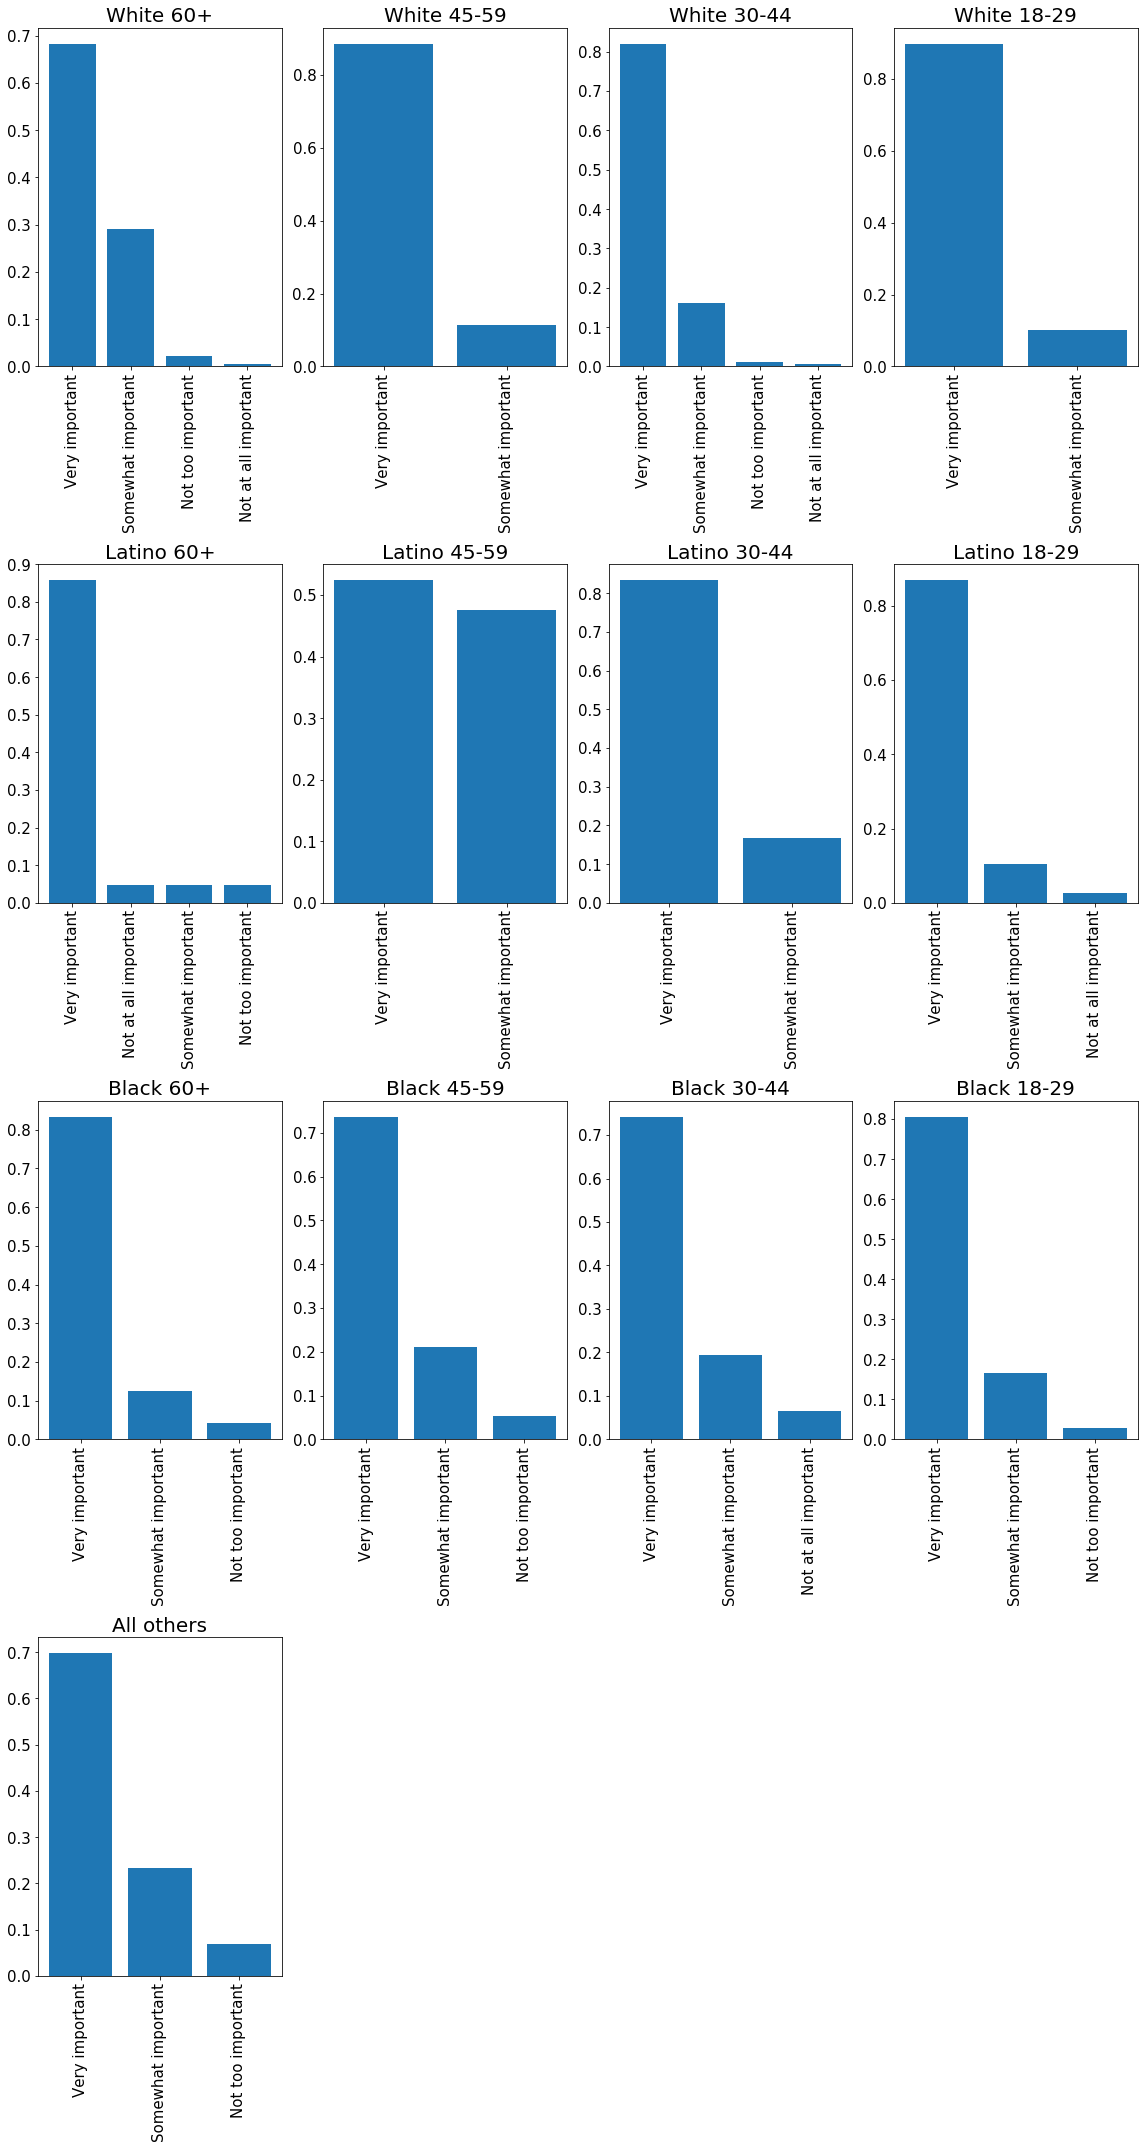

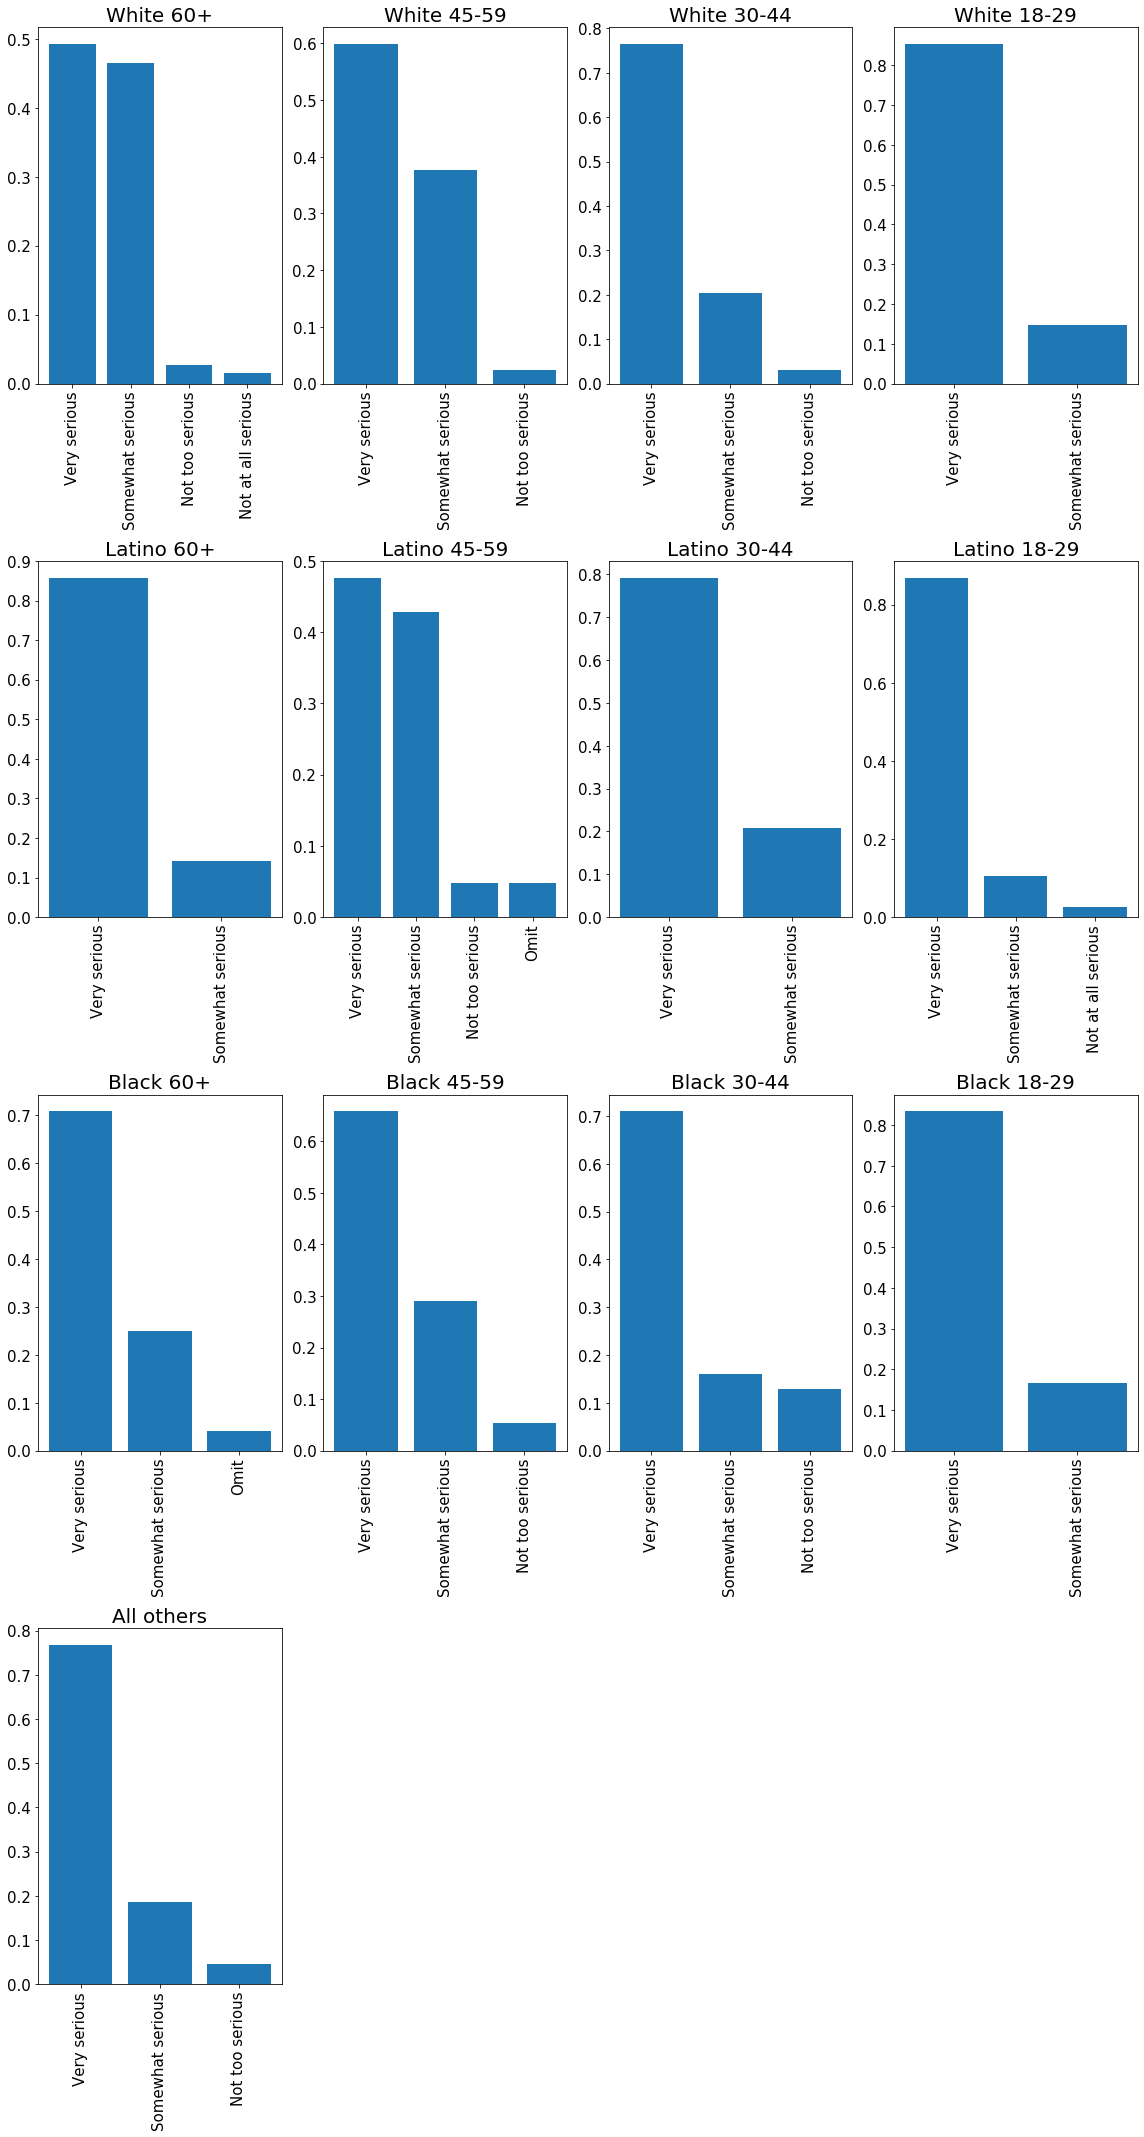

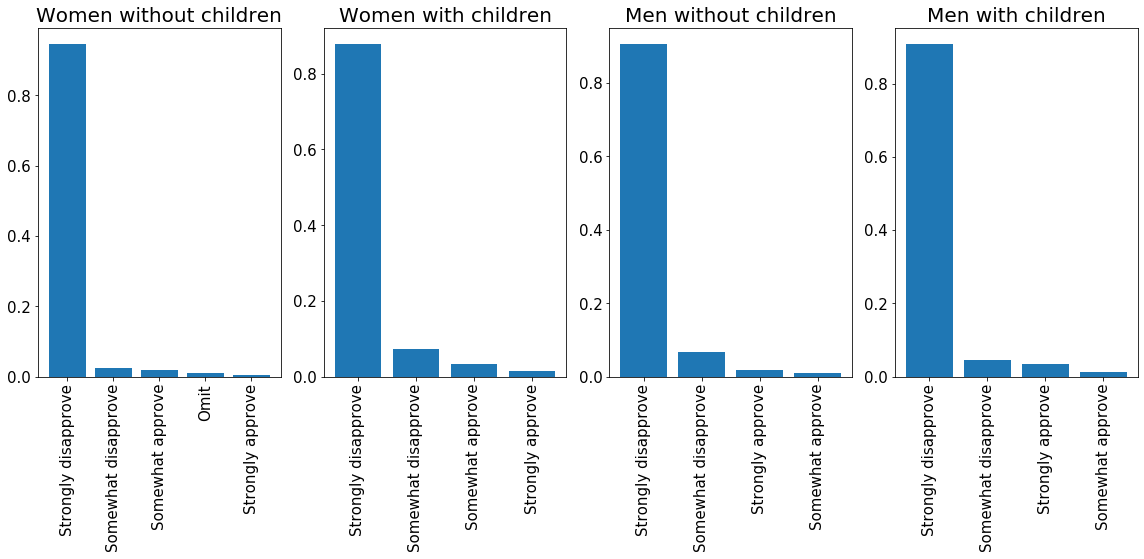

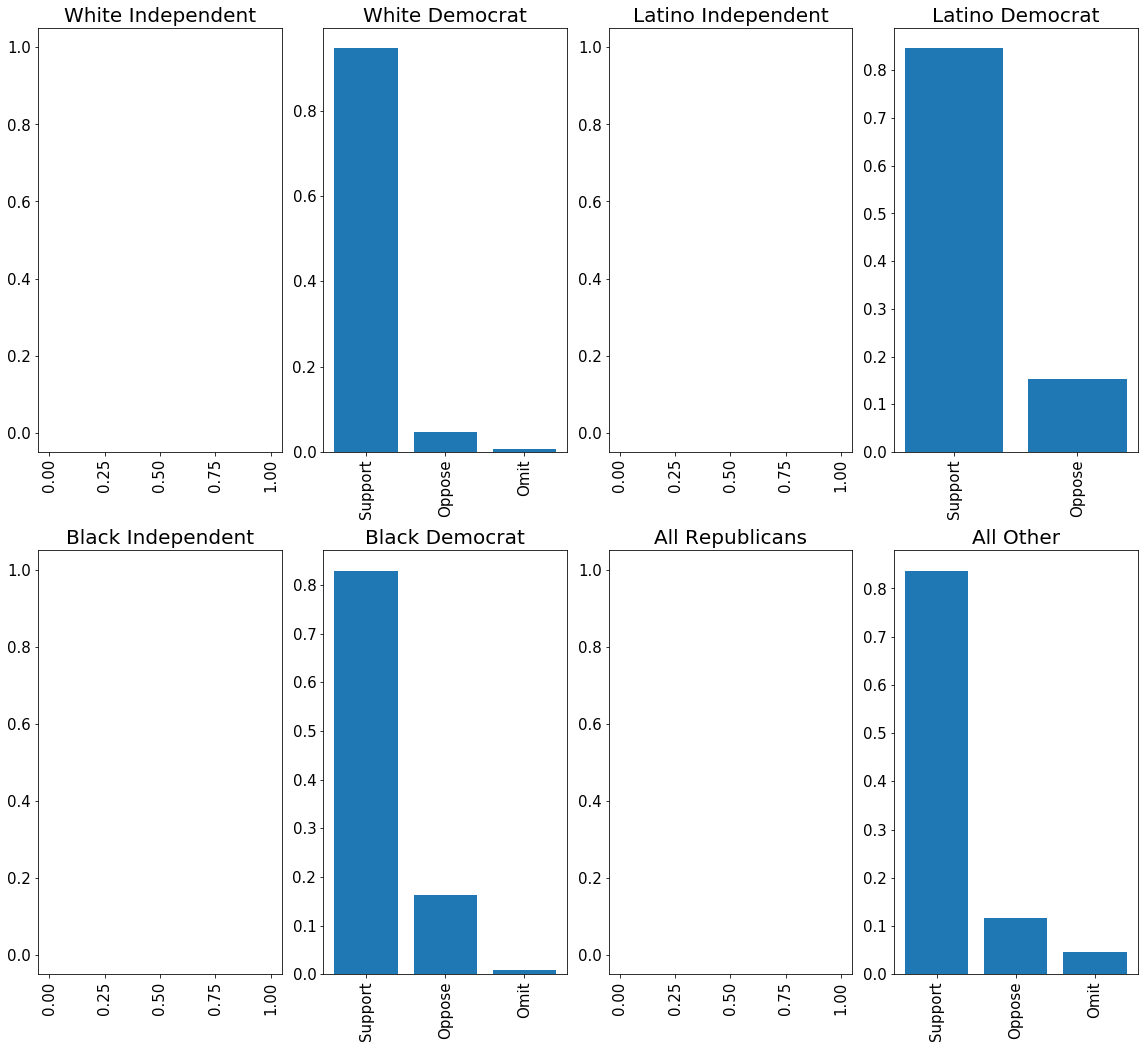

In [22]:
chart_simplifier(df_v3_lib_dems, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'WOMEN' )
chart_simplifier(df_v3_lib_dems, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'SEXUALHARASS' )
chart_simplifier(df_v3_lib_dems, group = group_parents, filt = 'PARENTS', issue = 'TRUMP4' )
chart_simplifier(df_v3_lib_dems, group = group_party_by_race, filt = 'PARTYBYRACE', issue = 'GUN16' )


### Mod/Conserv. Democrats

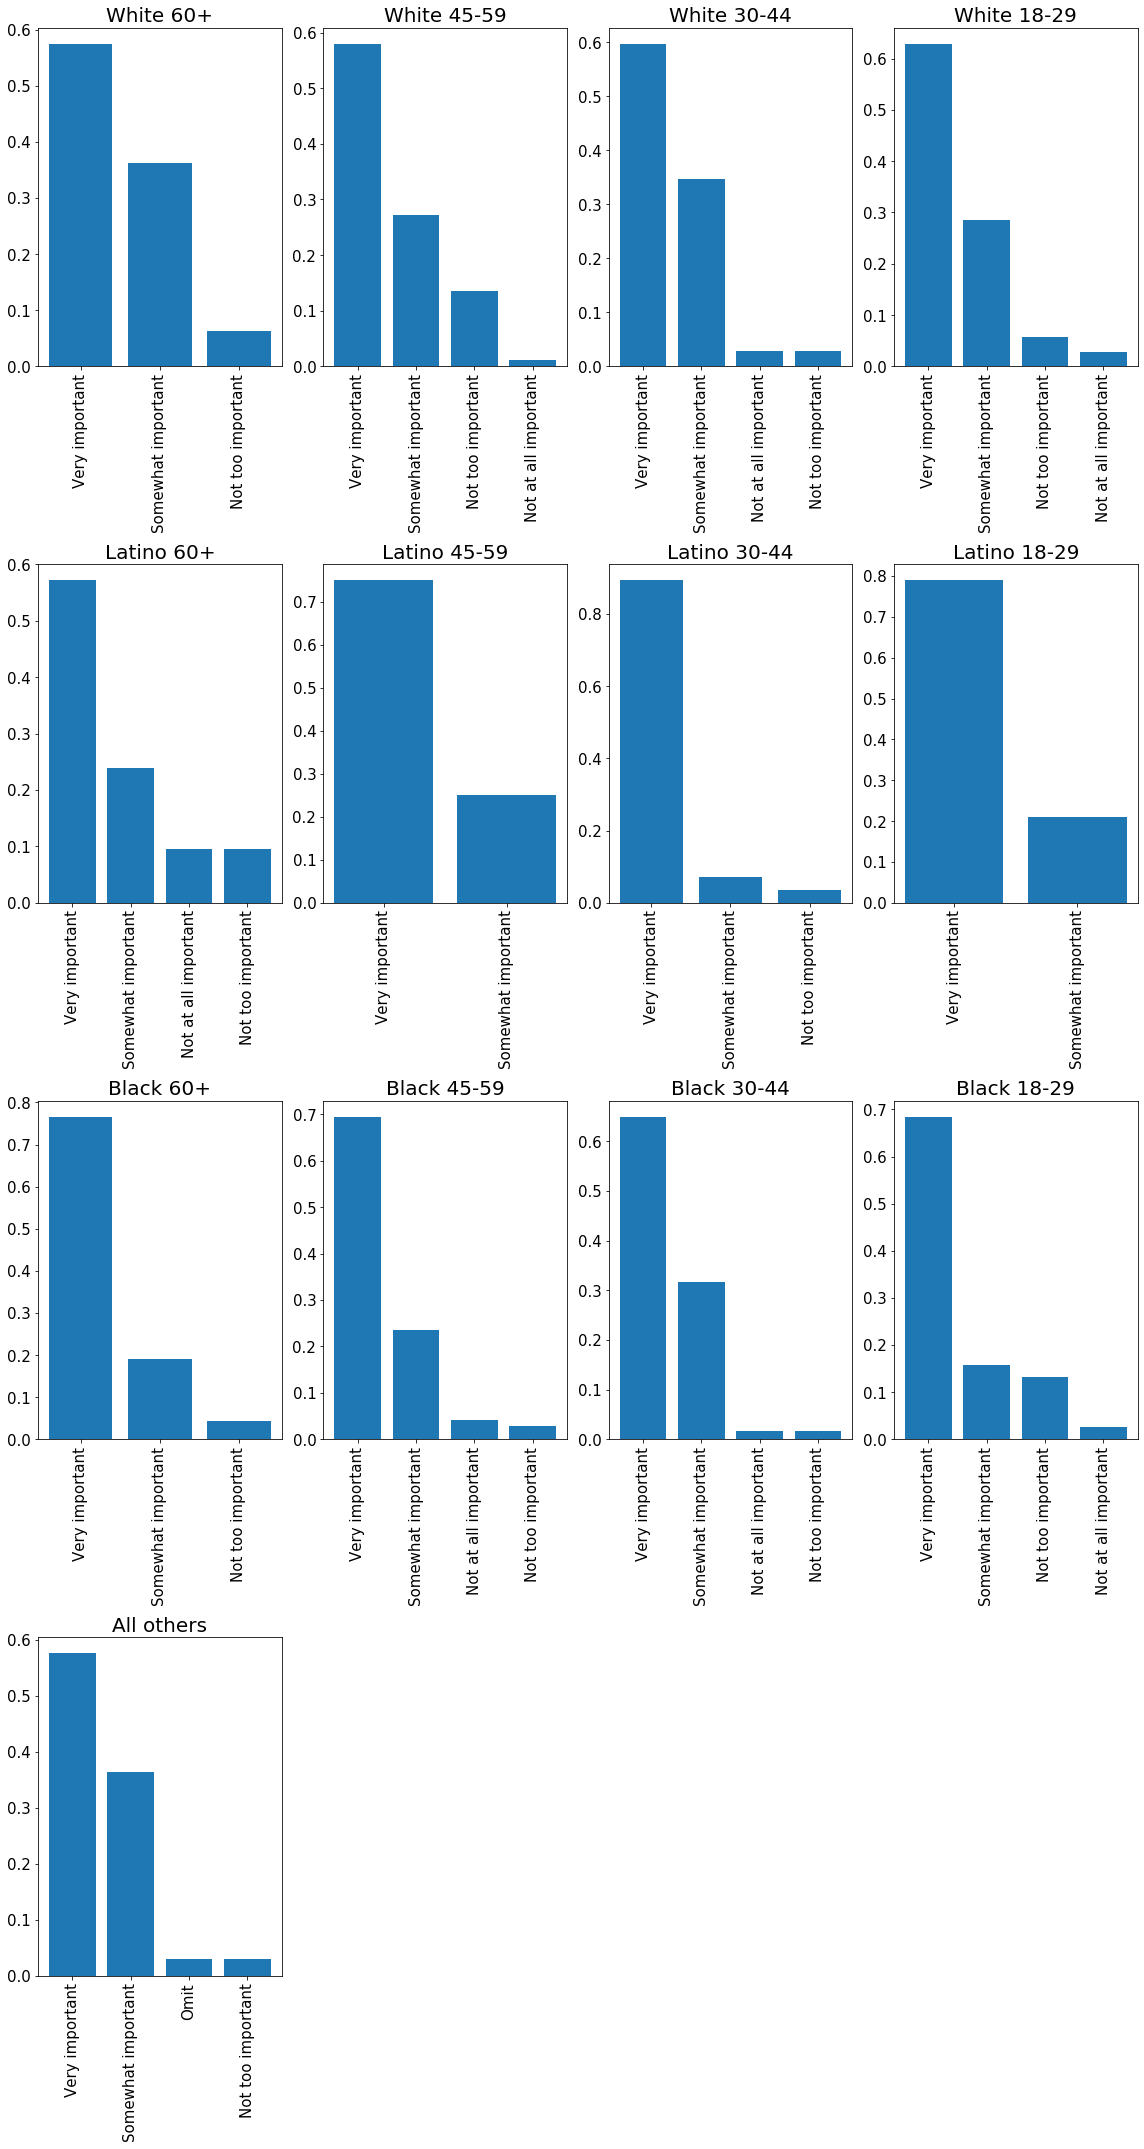

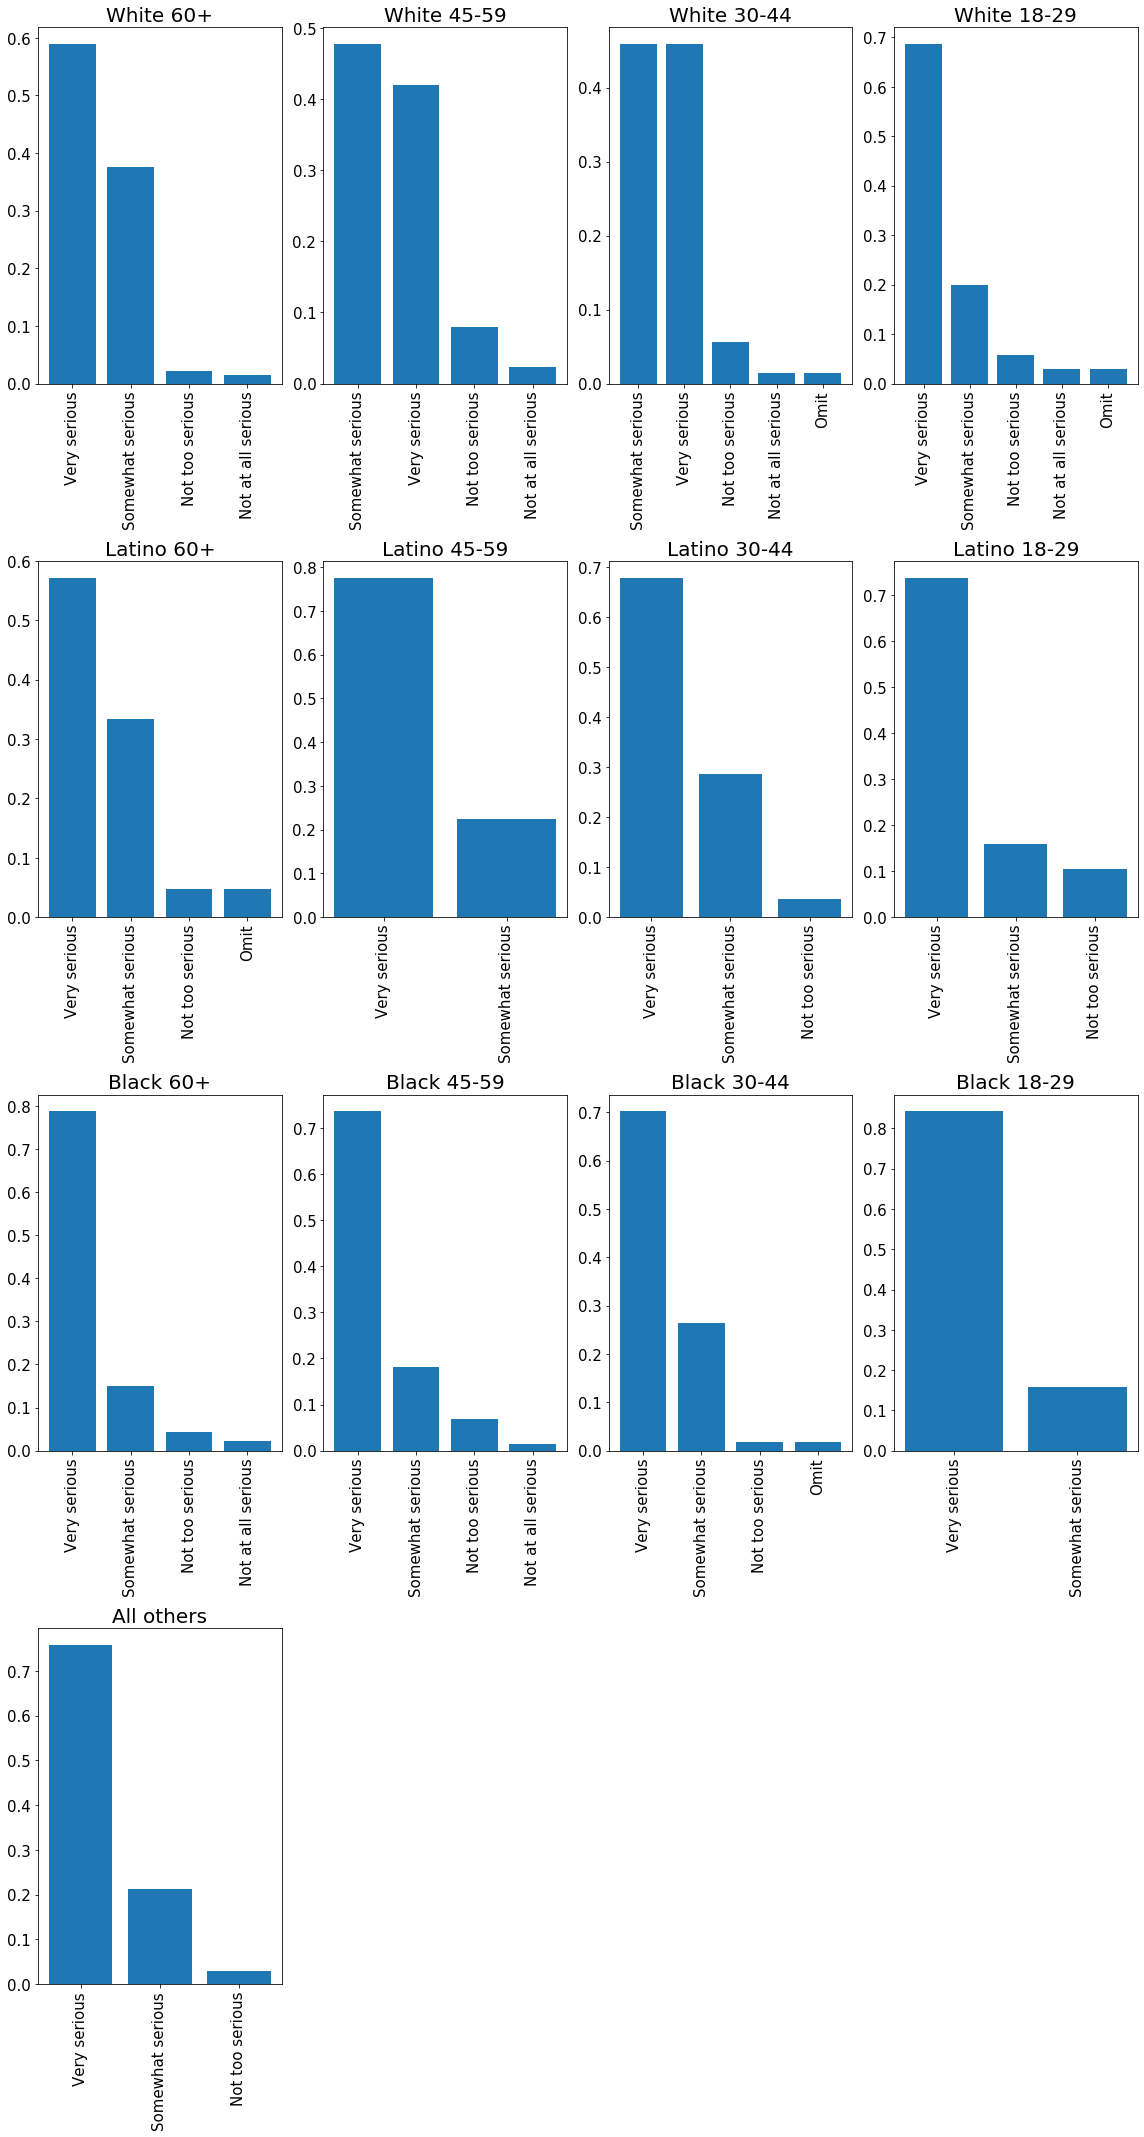

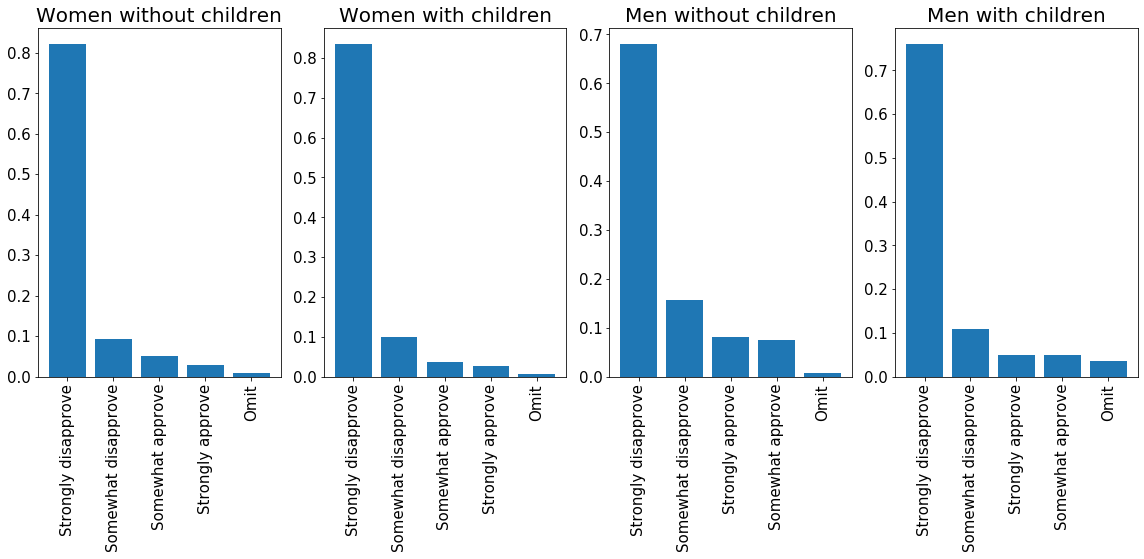

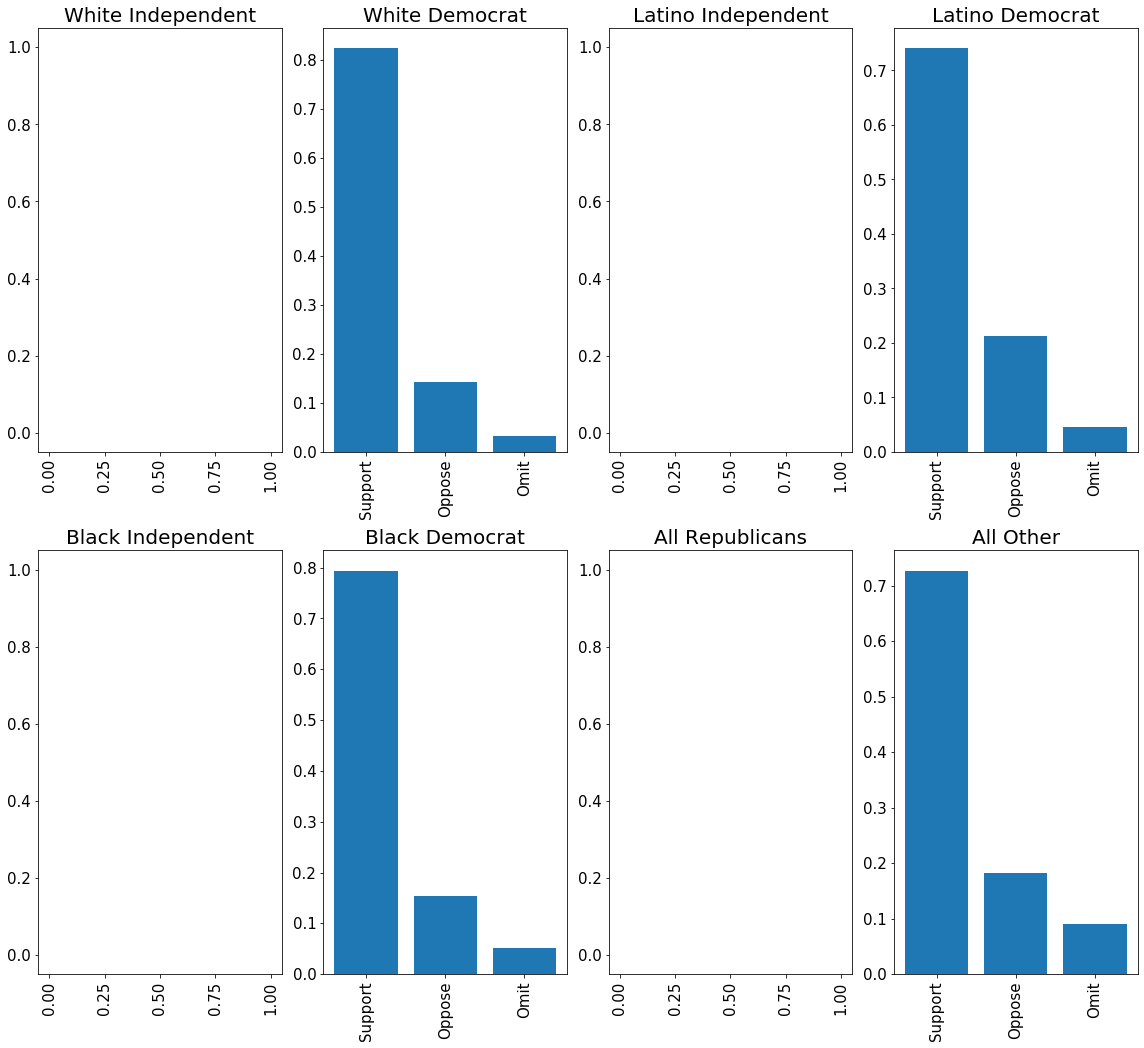

In [23]:
chart_simplifier(df_v3_mod_con_dems, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'WOMEN' )
chart_simplifier(df_v3_mod_con_dems, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'SEXUALHARASS' )
chart_simplifier(df_v3_mod_con_dems, group = group_parents, filt = 'PARENTS', issue = 'TRUMP4' )
chart_simplifier(df_v3_mod_con_dems, group = group_party_by_race, filt = 'PARTYBYRACE', issue = 'GUN16' )


### Conservative Republicans

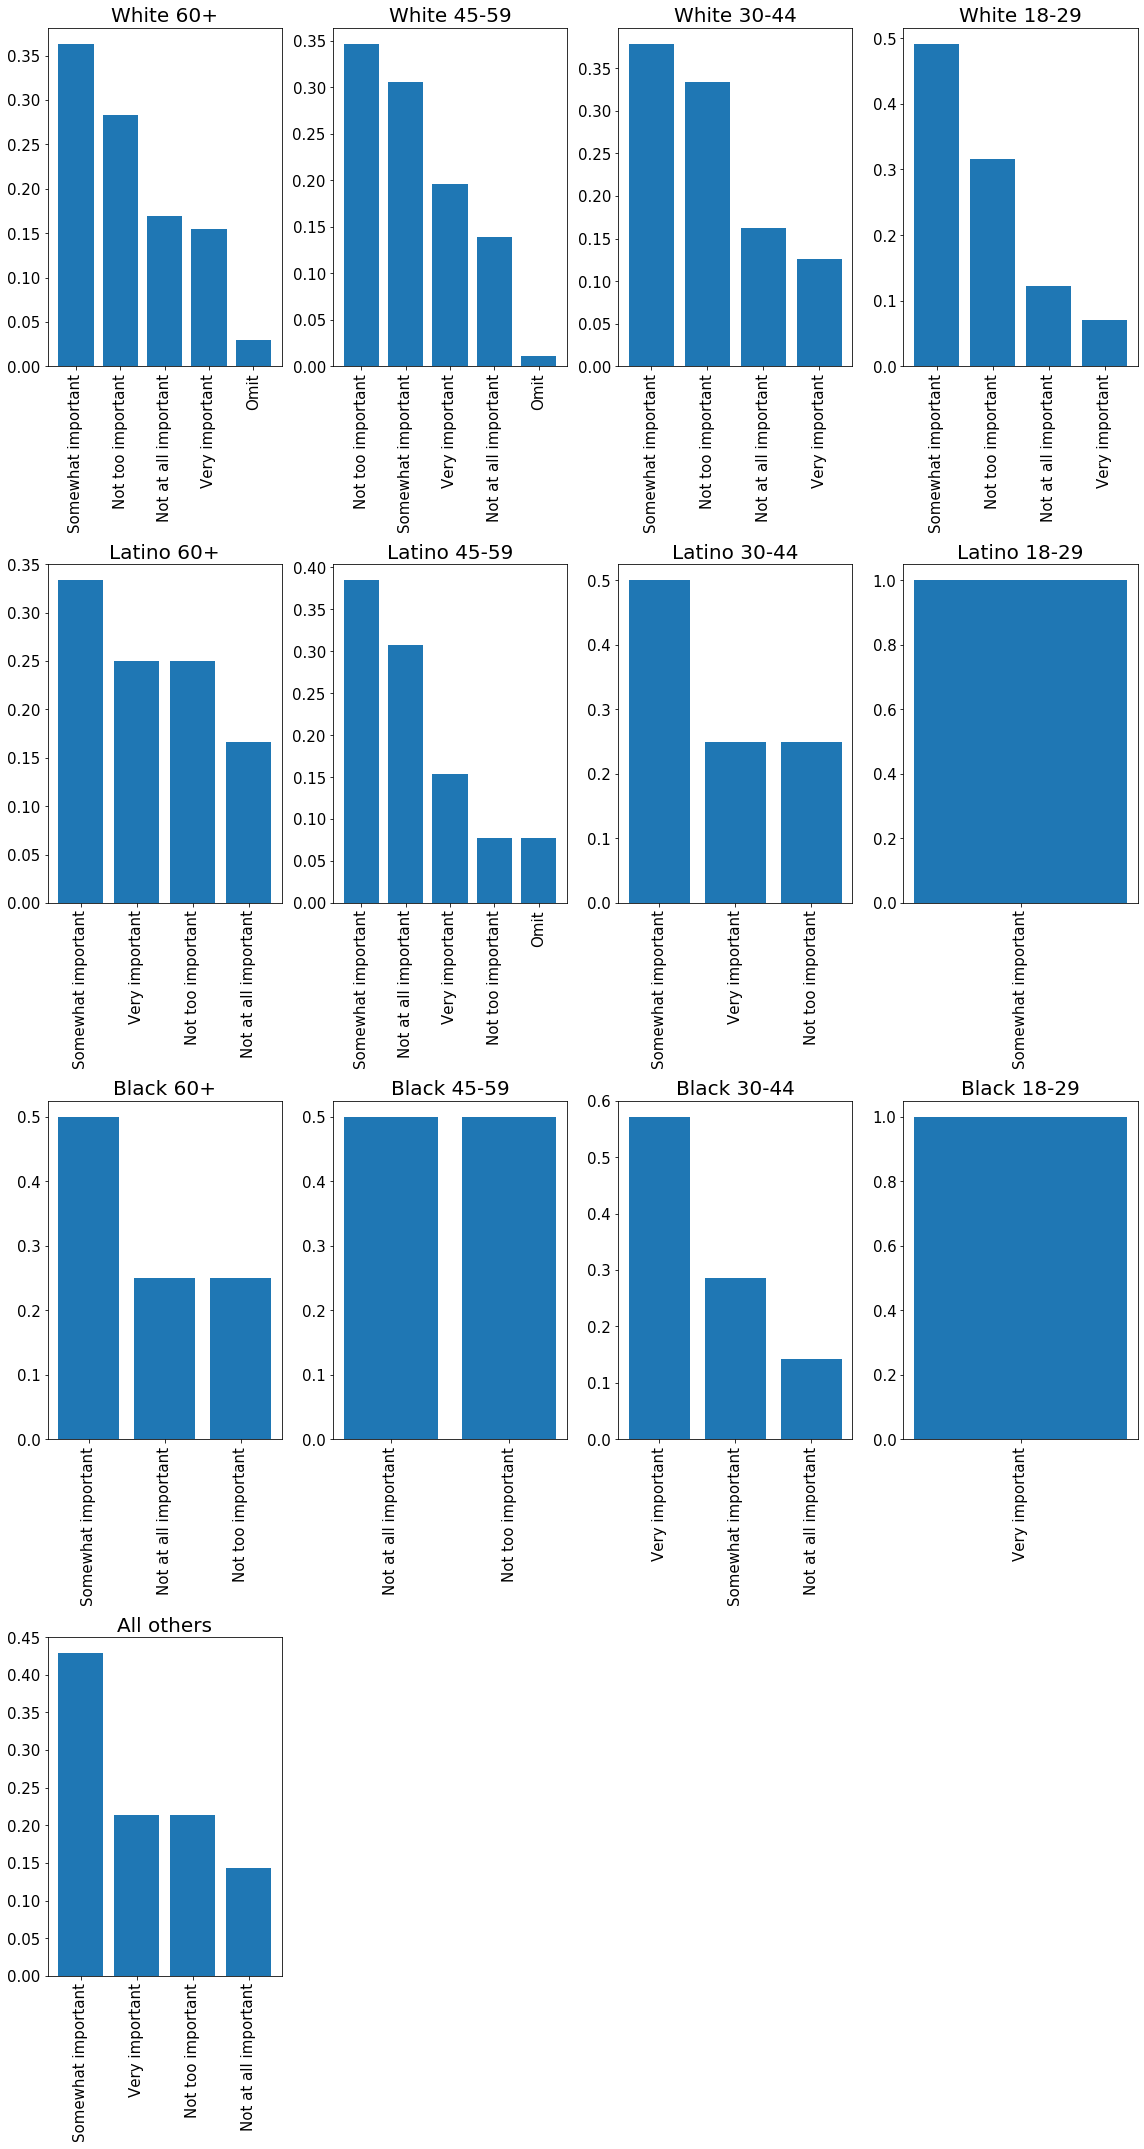

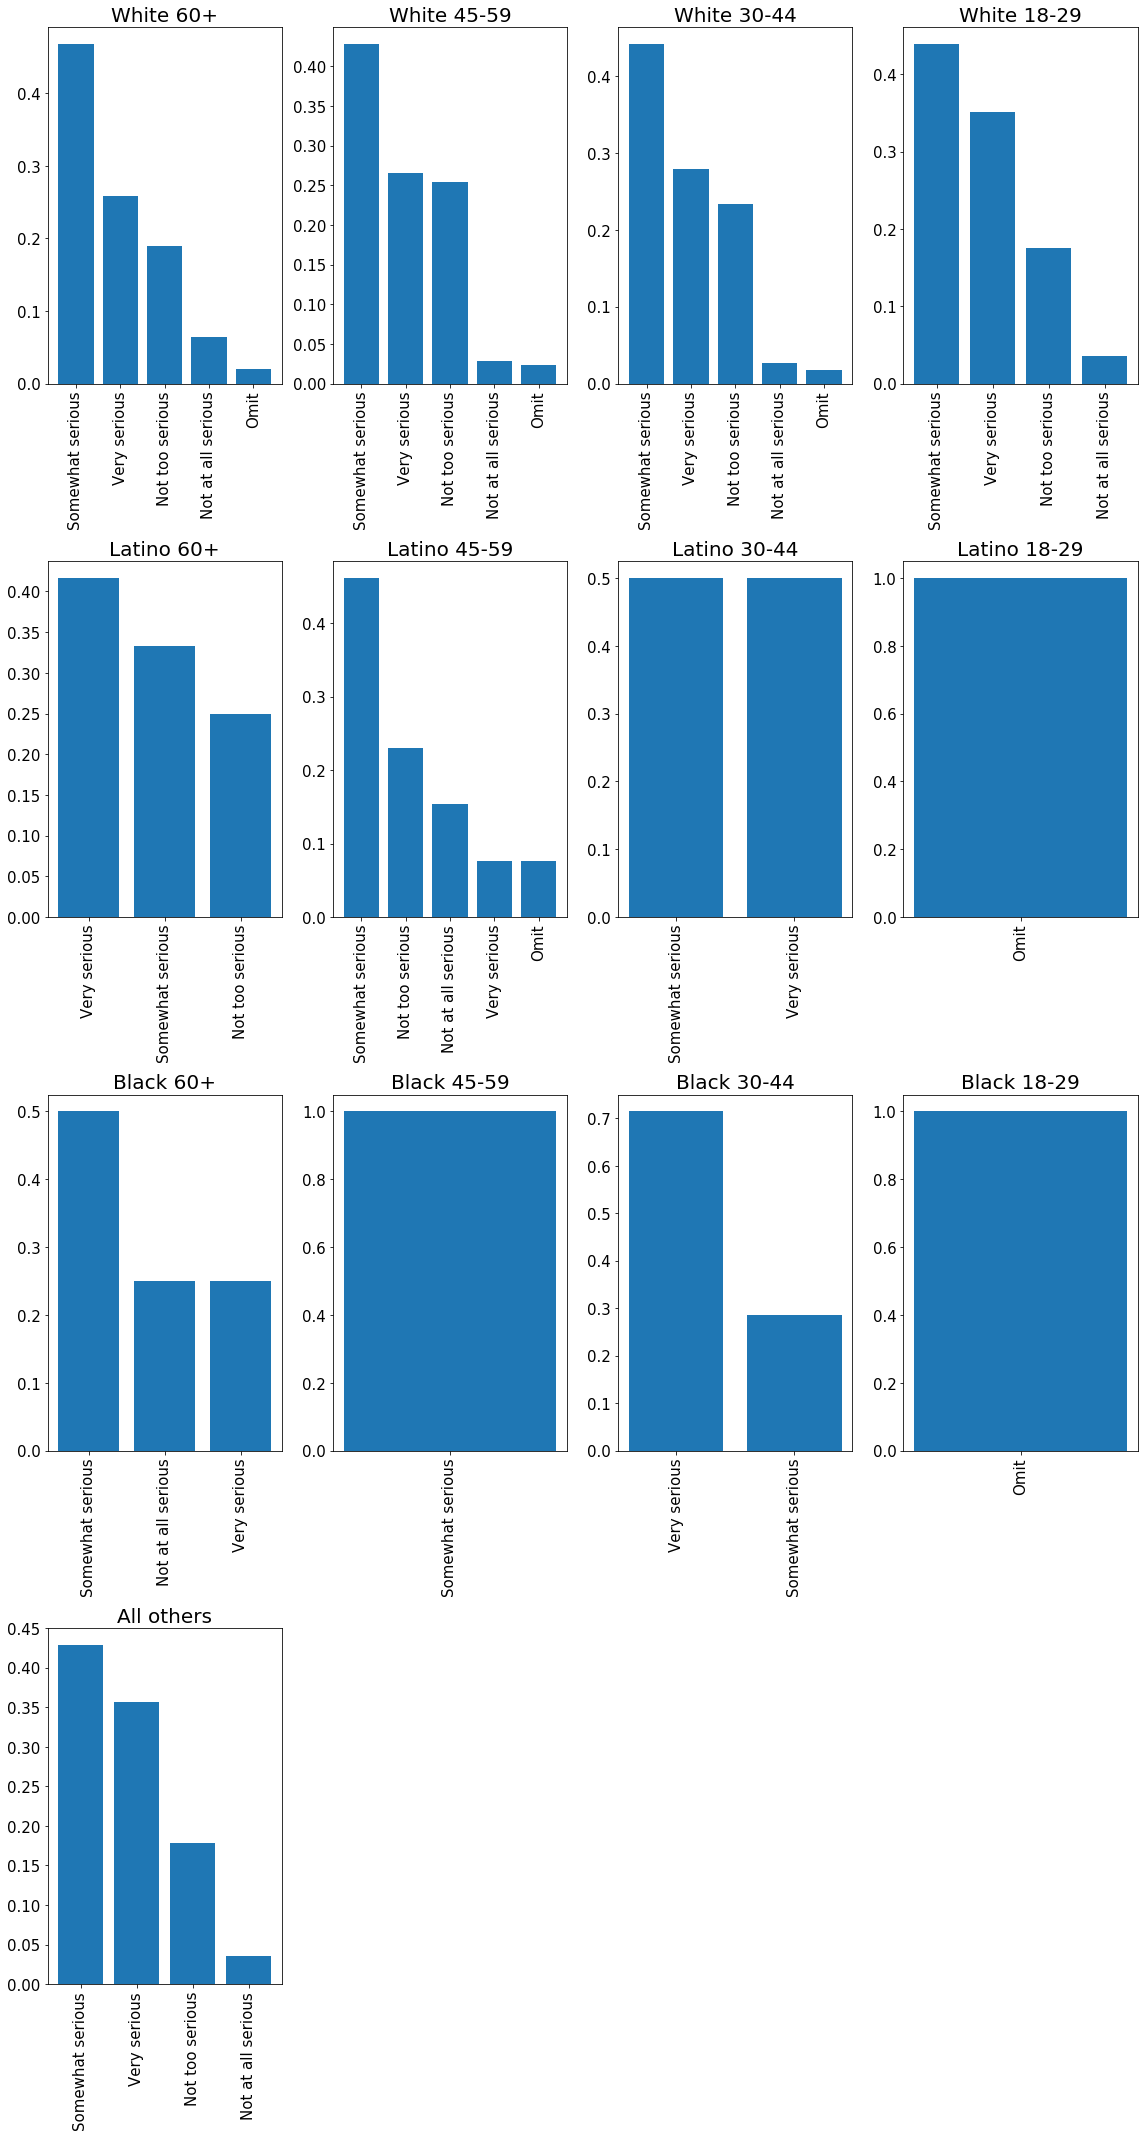

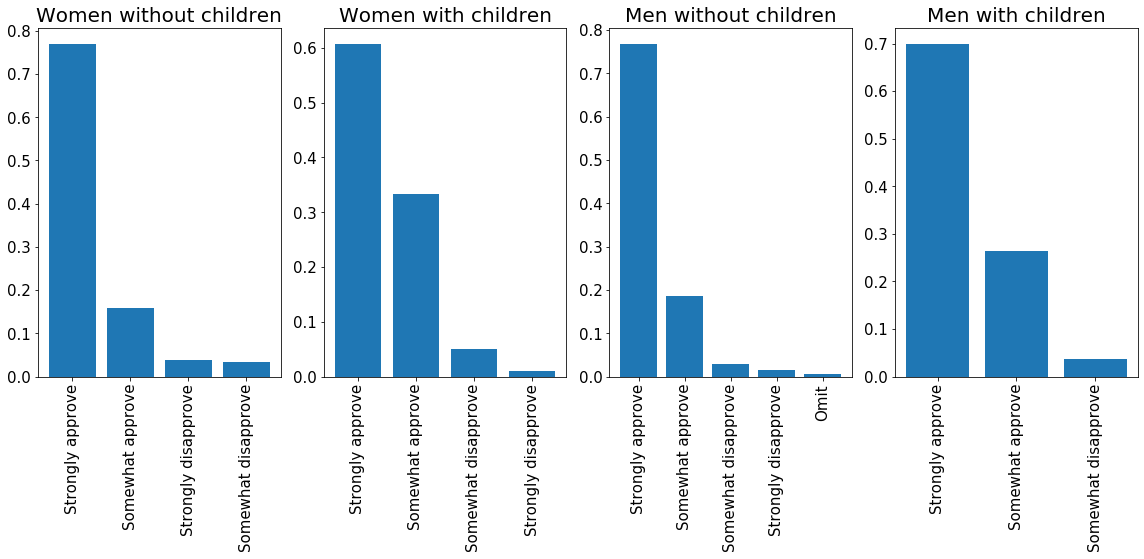

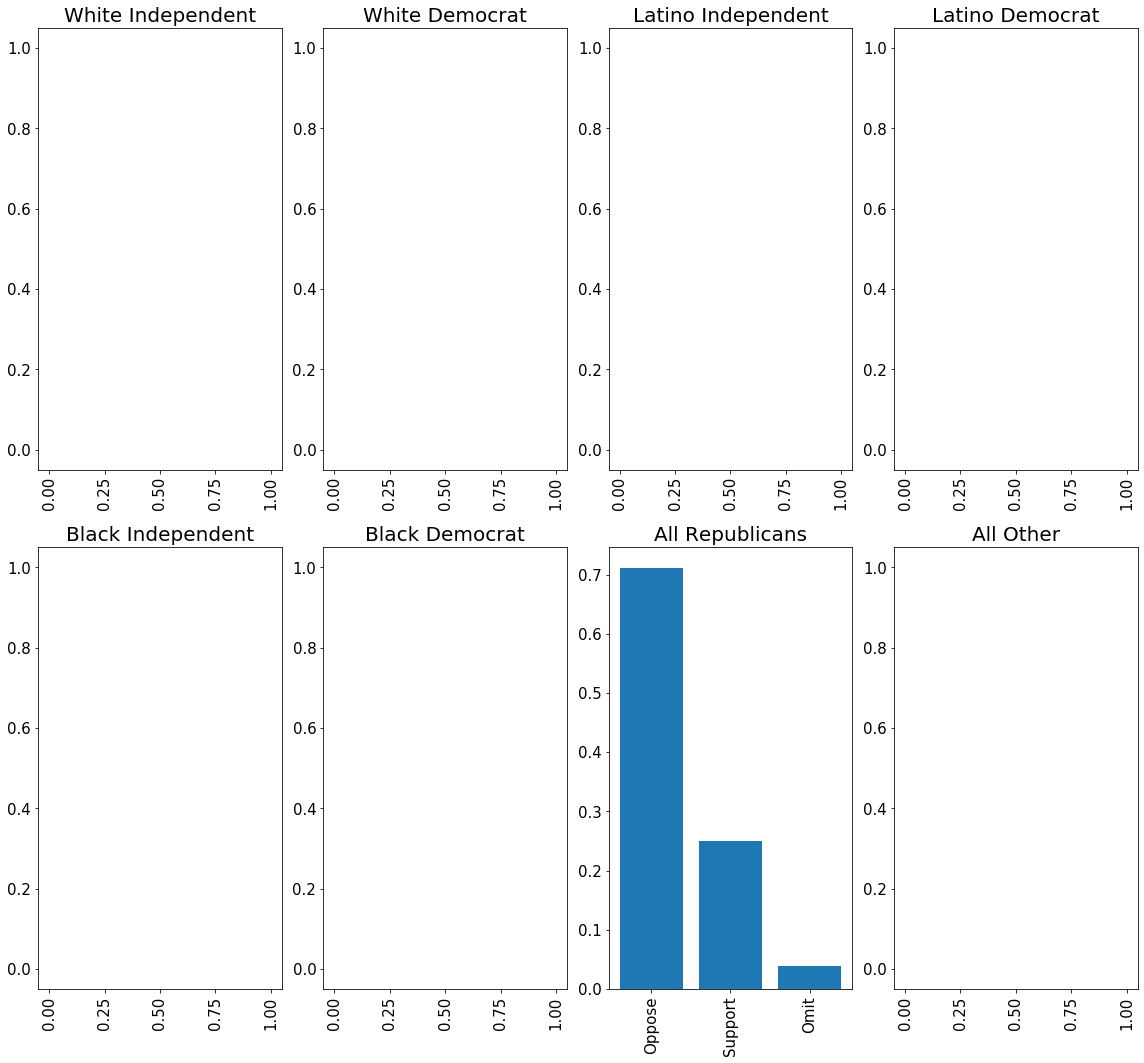

In [24]:
chart_simplifier(df_v3_con_rep, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'WOMEN' )
chart_simplifier(df_v3_con_rep, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'SEXUALHARASS' )
chart_simplifier(df_v3_con_rep, group = group_parents, filt = 'PARENTS', issue = 'TRUMP4' )
chart_simplifier(df_v3_con_rep, group = group_party_by_race, filt = 'PARTYBYRACE', issue = 'GUN16' )


### Moderate Independents

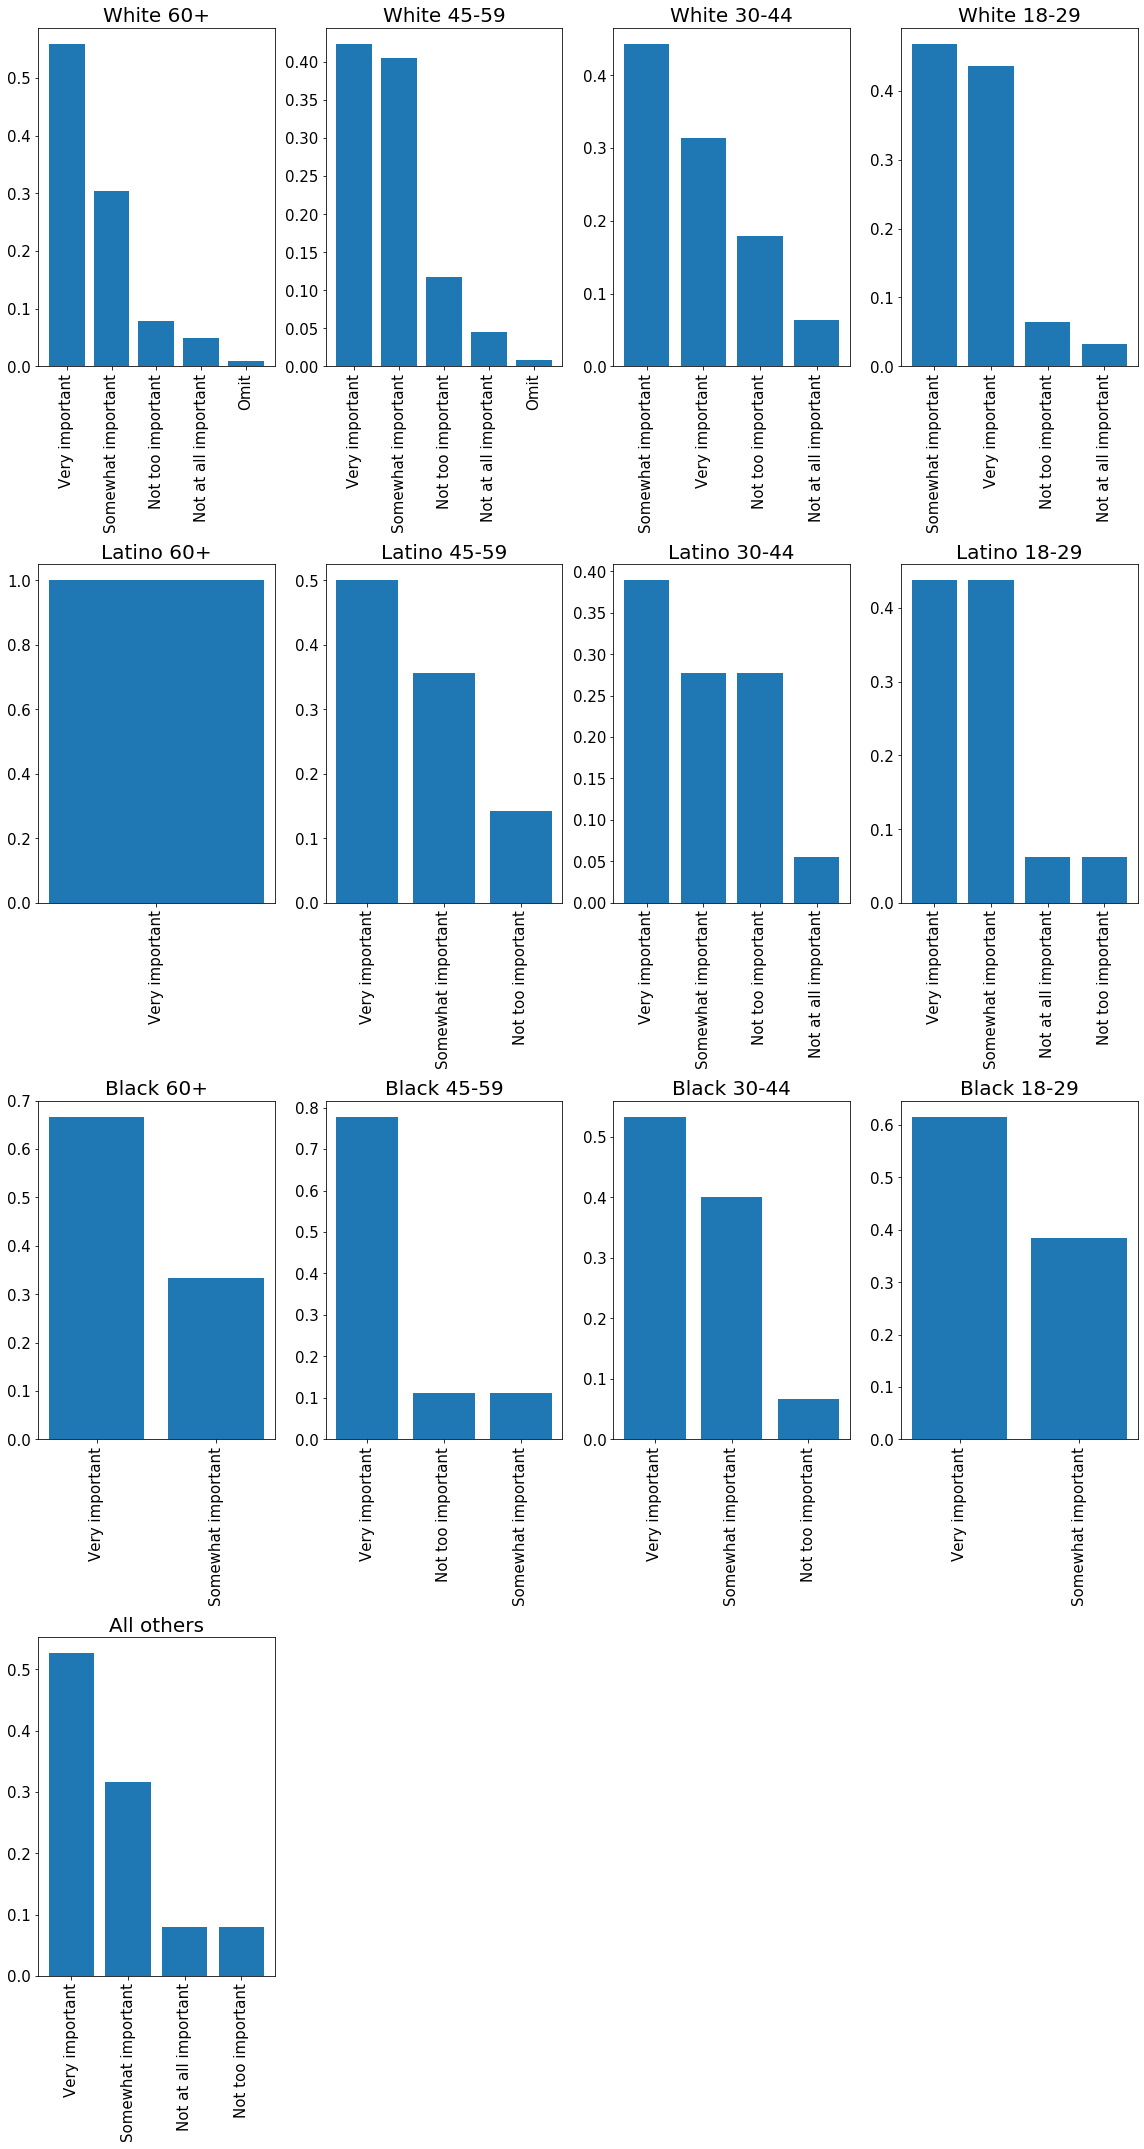

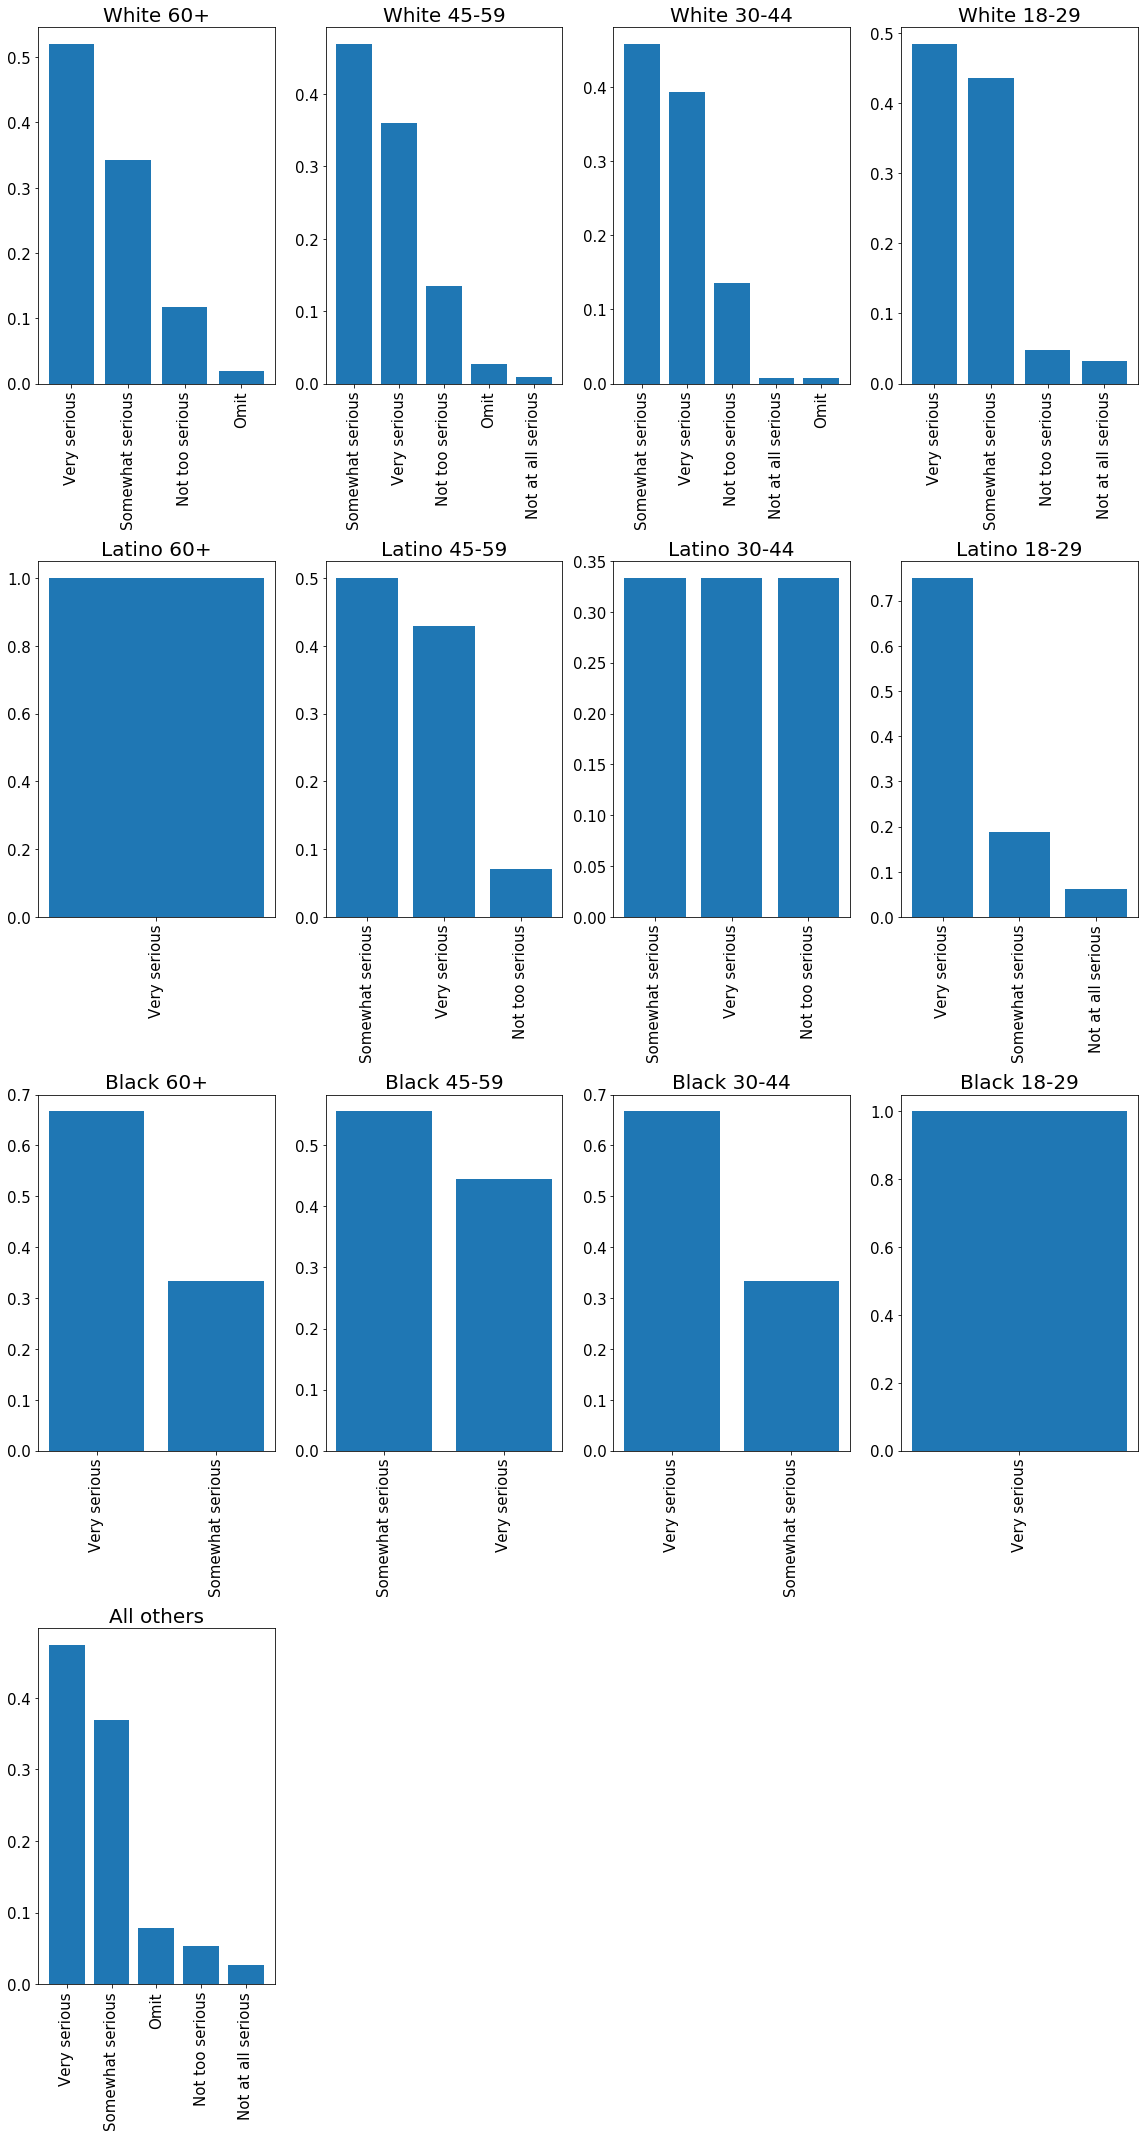

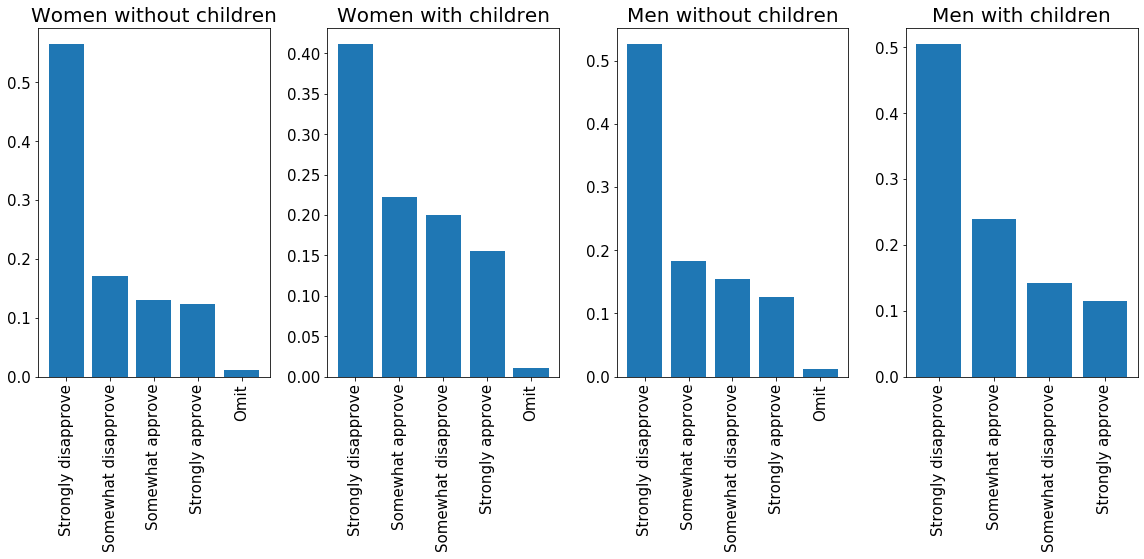

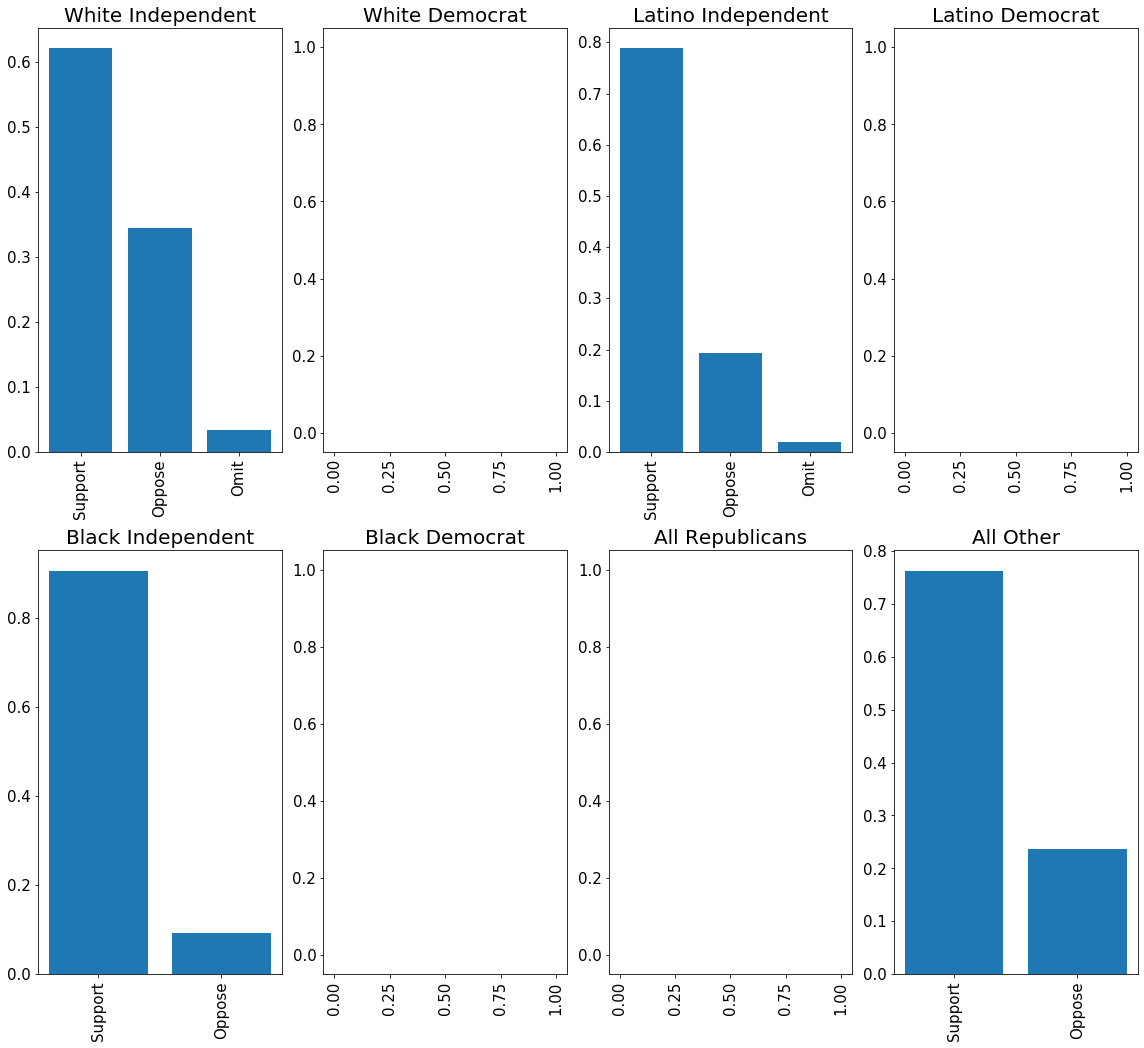

In [25]:
chart_simplifier(df_v3_mod_ind, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'WOMEN' )
chart_simplifier(df_v3_mod_ind, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'SEXUALHARASS' )
chart_simplifier(df_v3_mod_ind, group = group_parents, filt = 'PARENTS', issue = 'TRUMP4' )
chart_simplifier(df_v3_mod_ind, group = group_party_by_race, filt = 'PARTYBYRACE', issue = 'GUN16' )


### Mod./Liberal Republicans

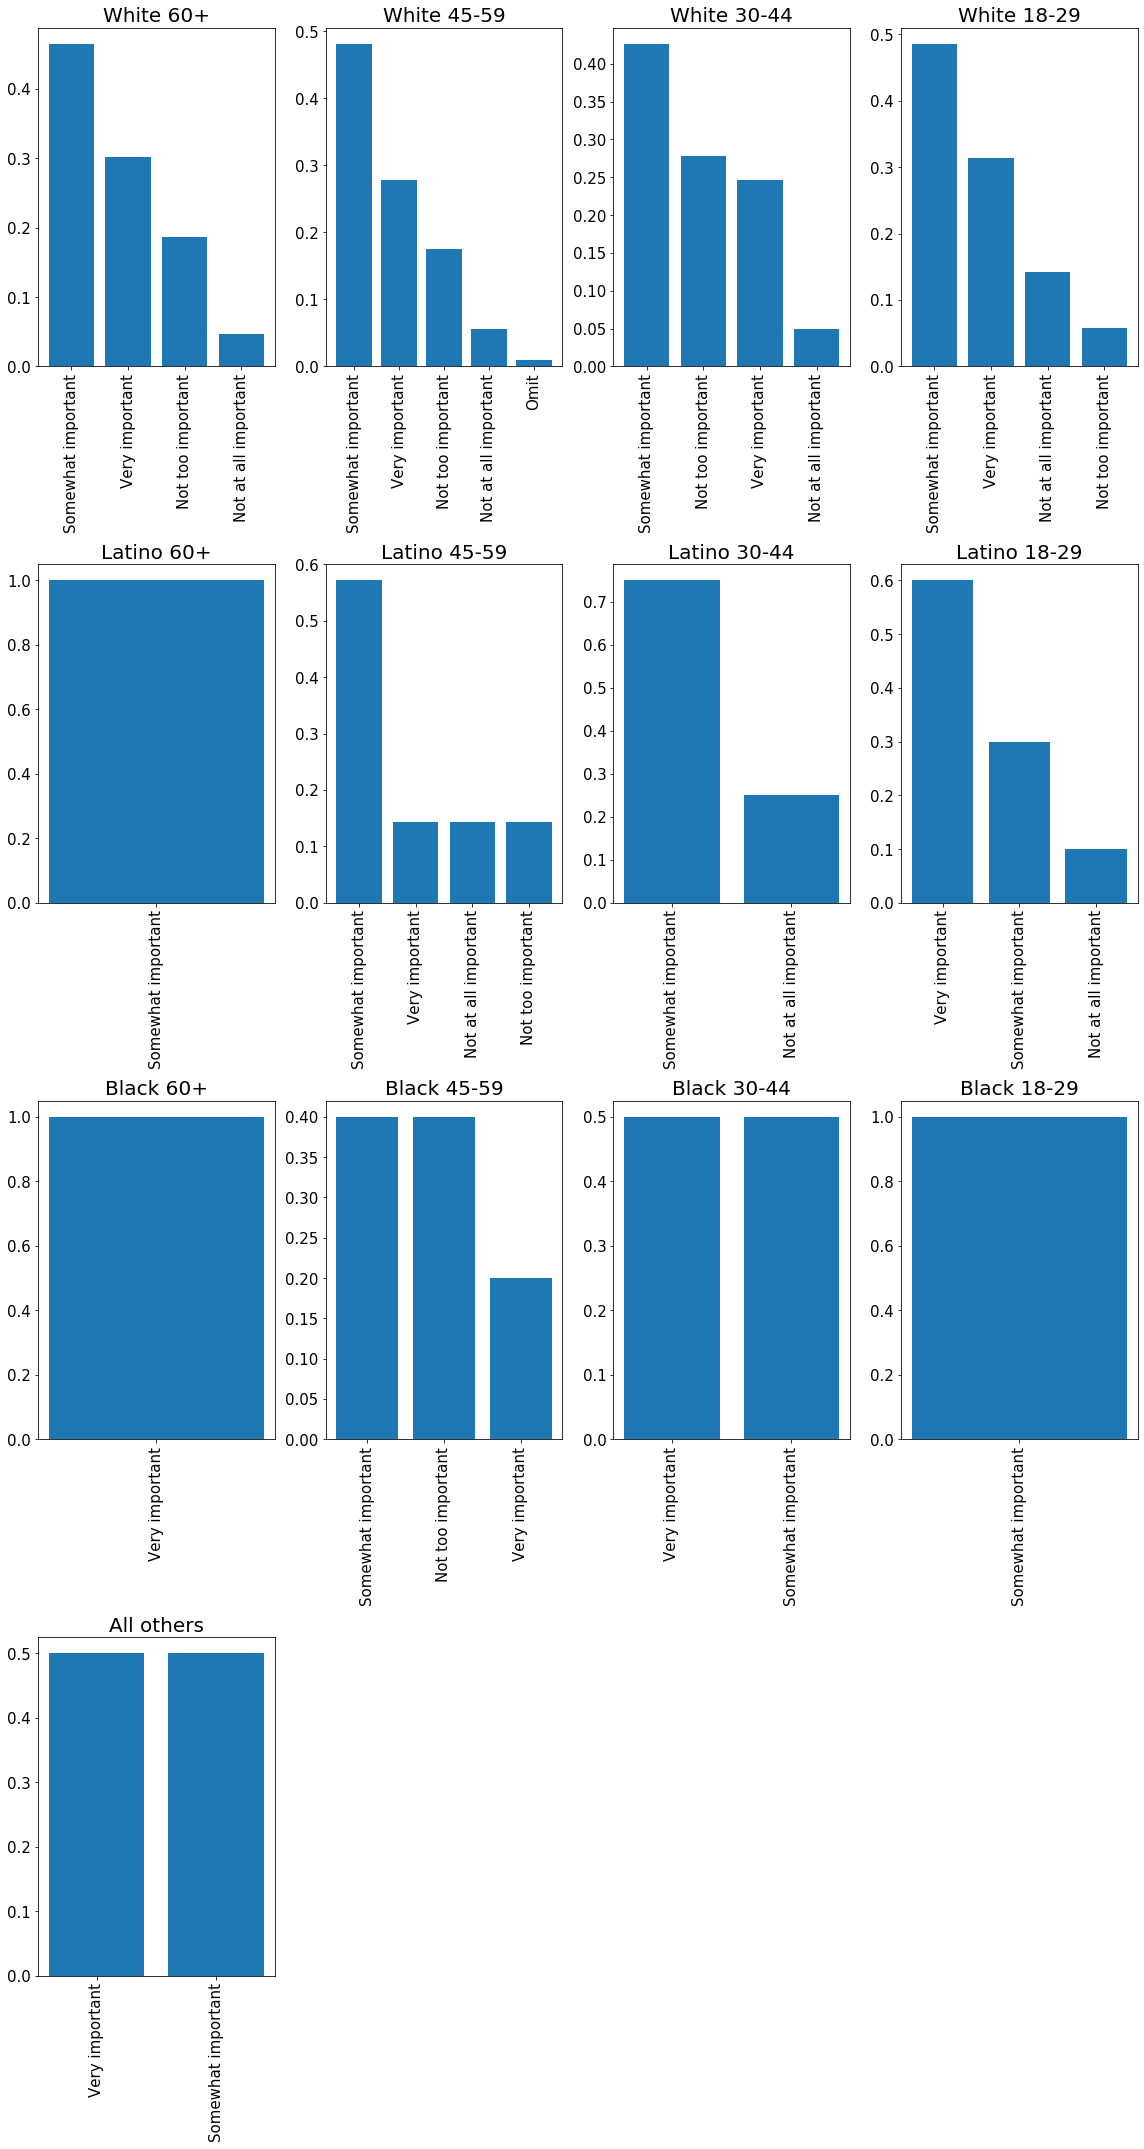

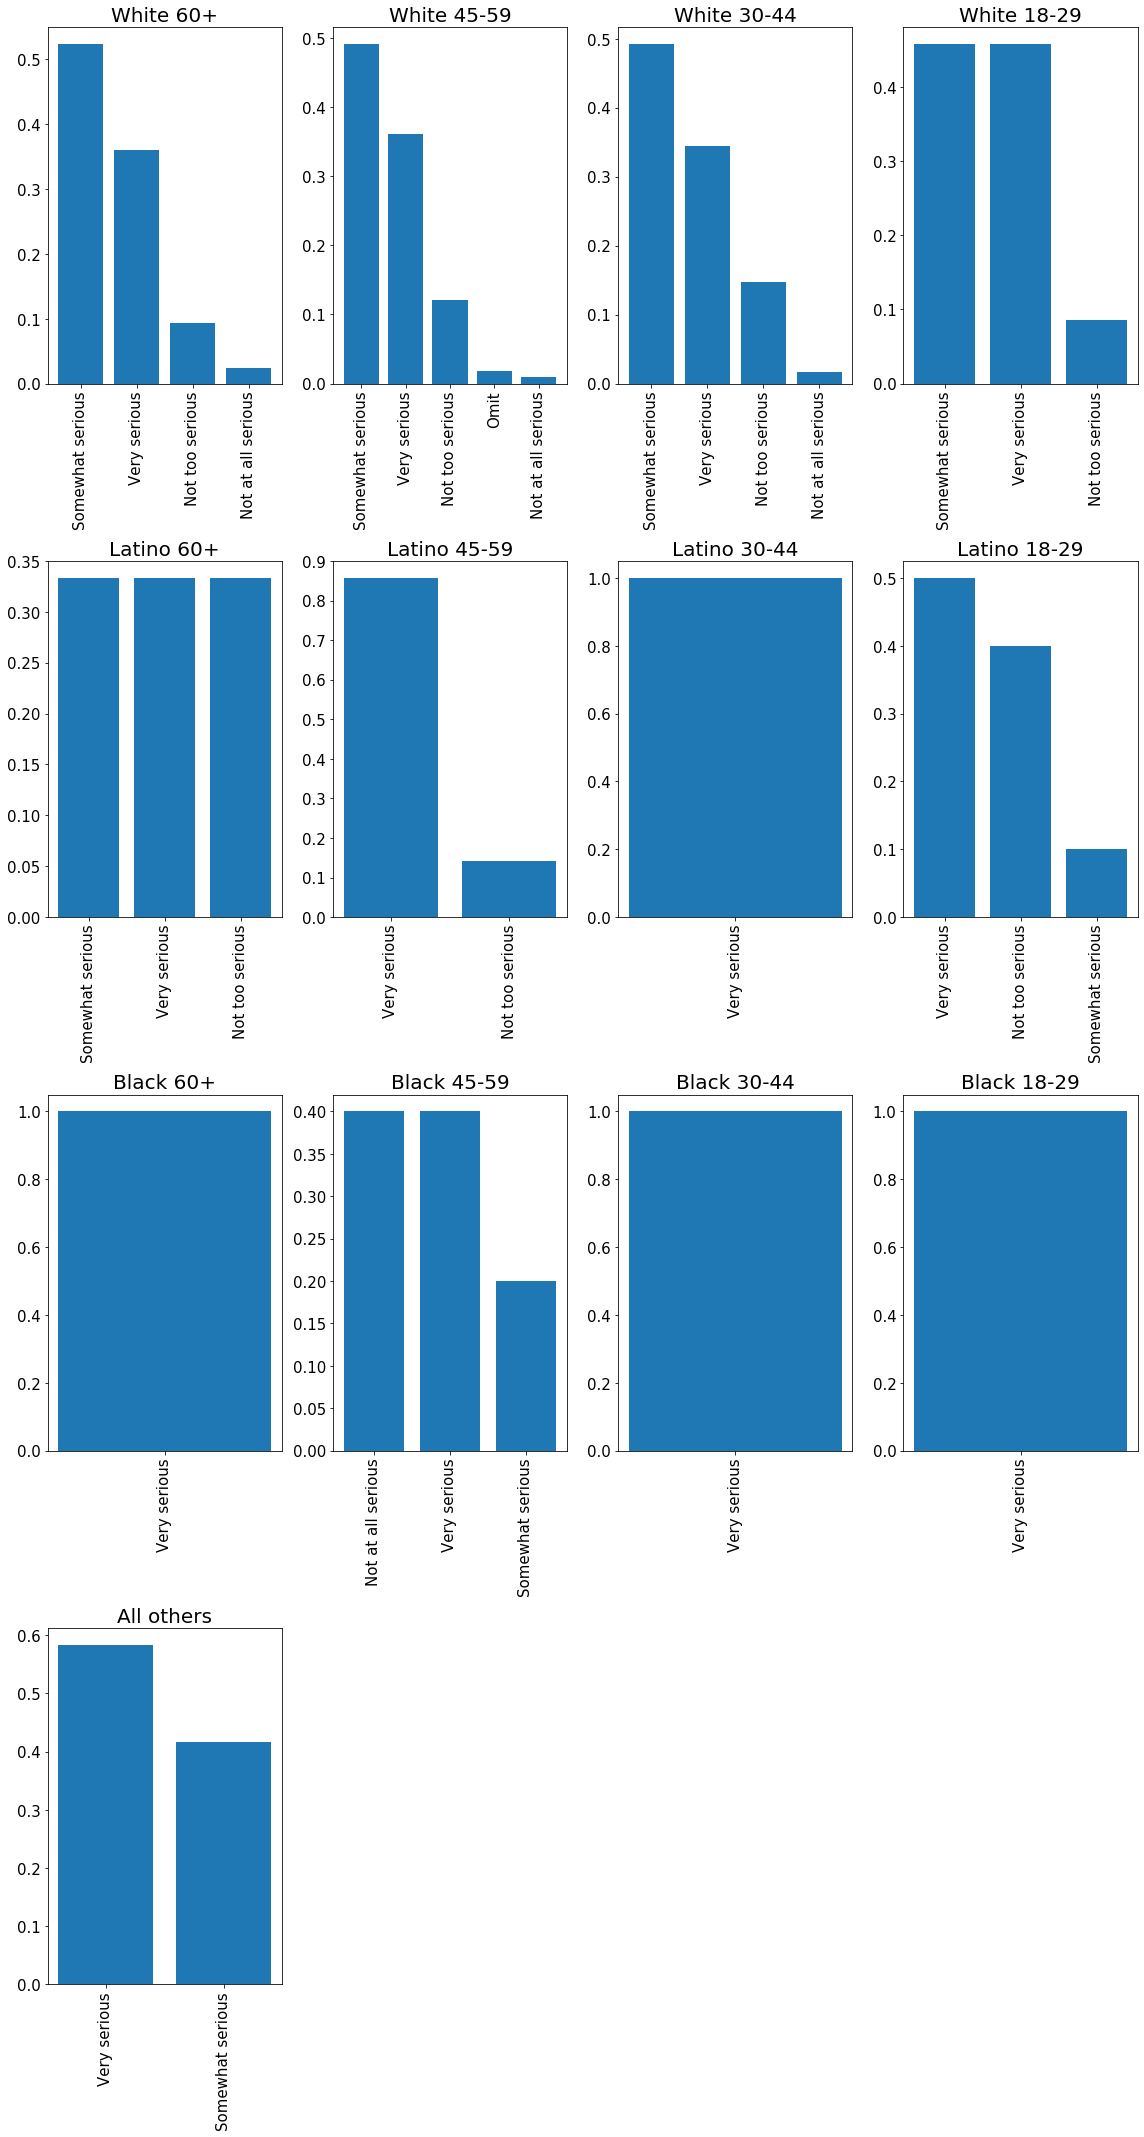

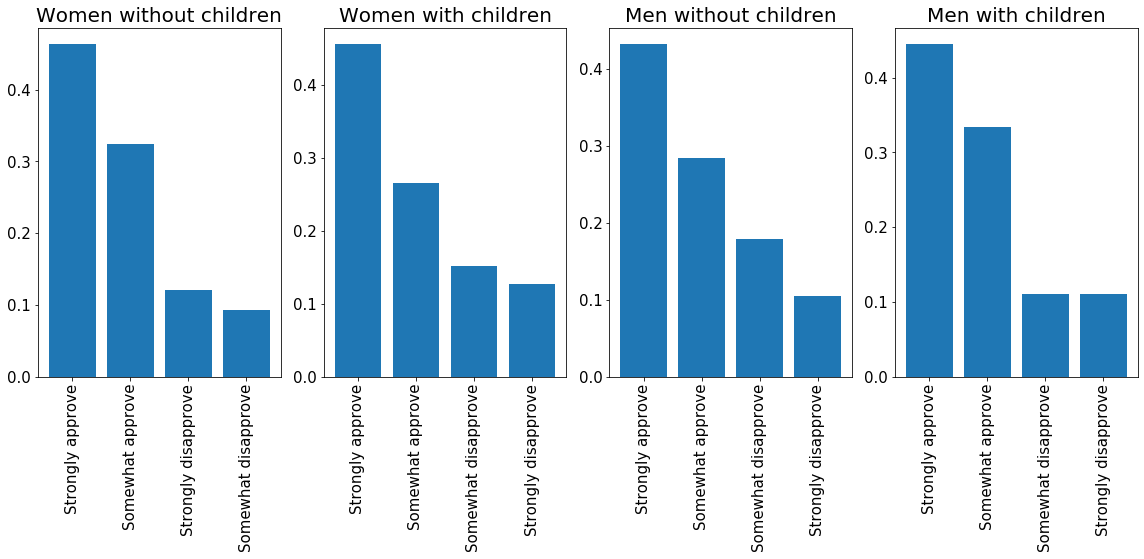

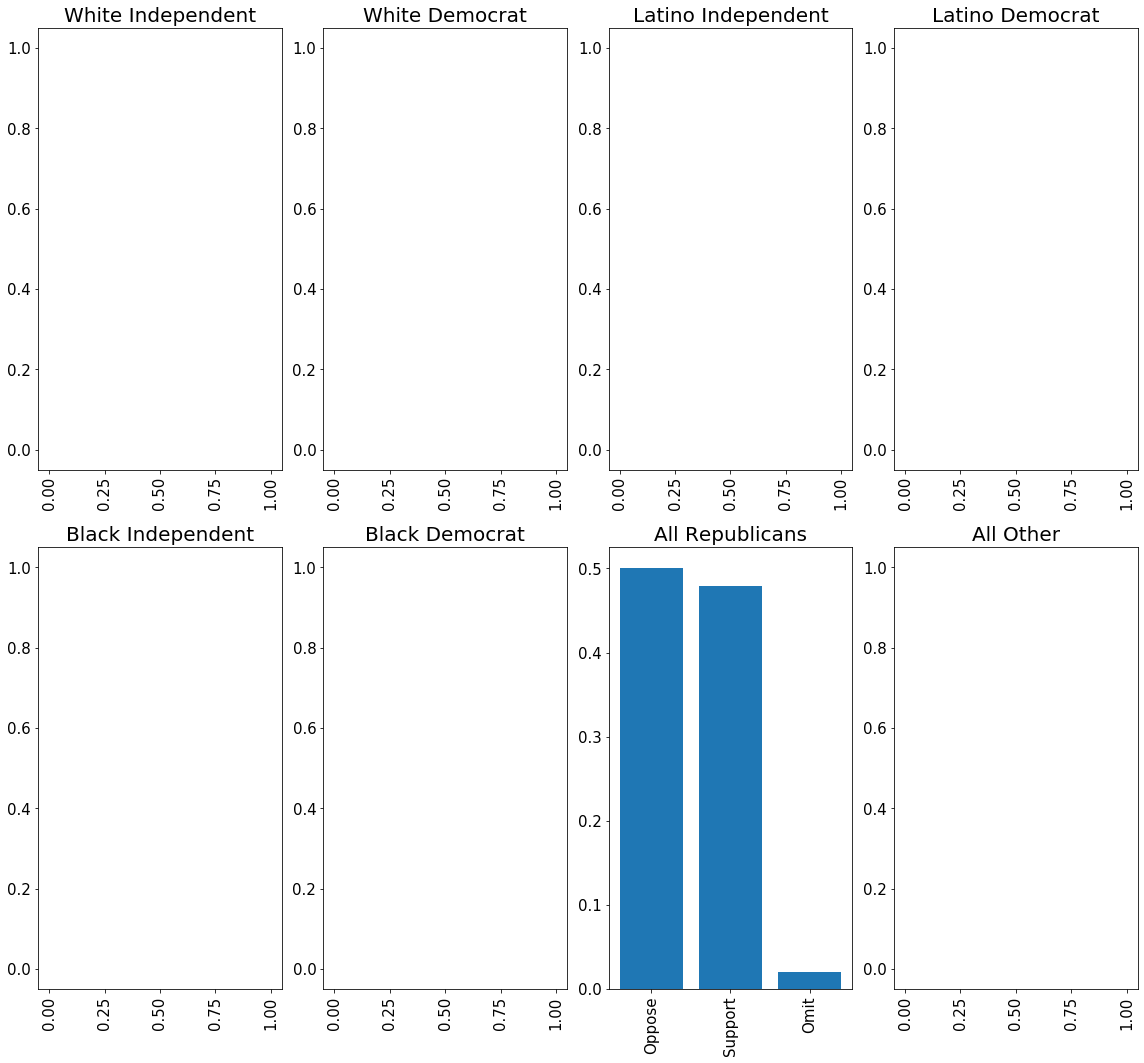

In [26]:
chart_simplifier(df_v3_mod_lib_rep, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'WOMEN' )
chart_simplifier(df_v3_mod_lib_rep, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'SEXUALHARASS' )
chart_simplifier(df_v3_mod_lib_rep, group = group_parents, filt = 'PARENTS', issue = 'TRUMP4' )
chart_simplifier(df_v3_mod_lib_rep, group = group_party_by_race, filt = 'PARTYBYRACE', issue = 'GUN16' )


### Liberal Independents 

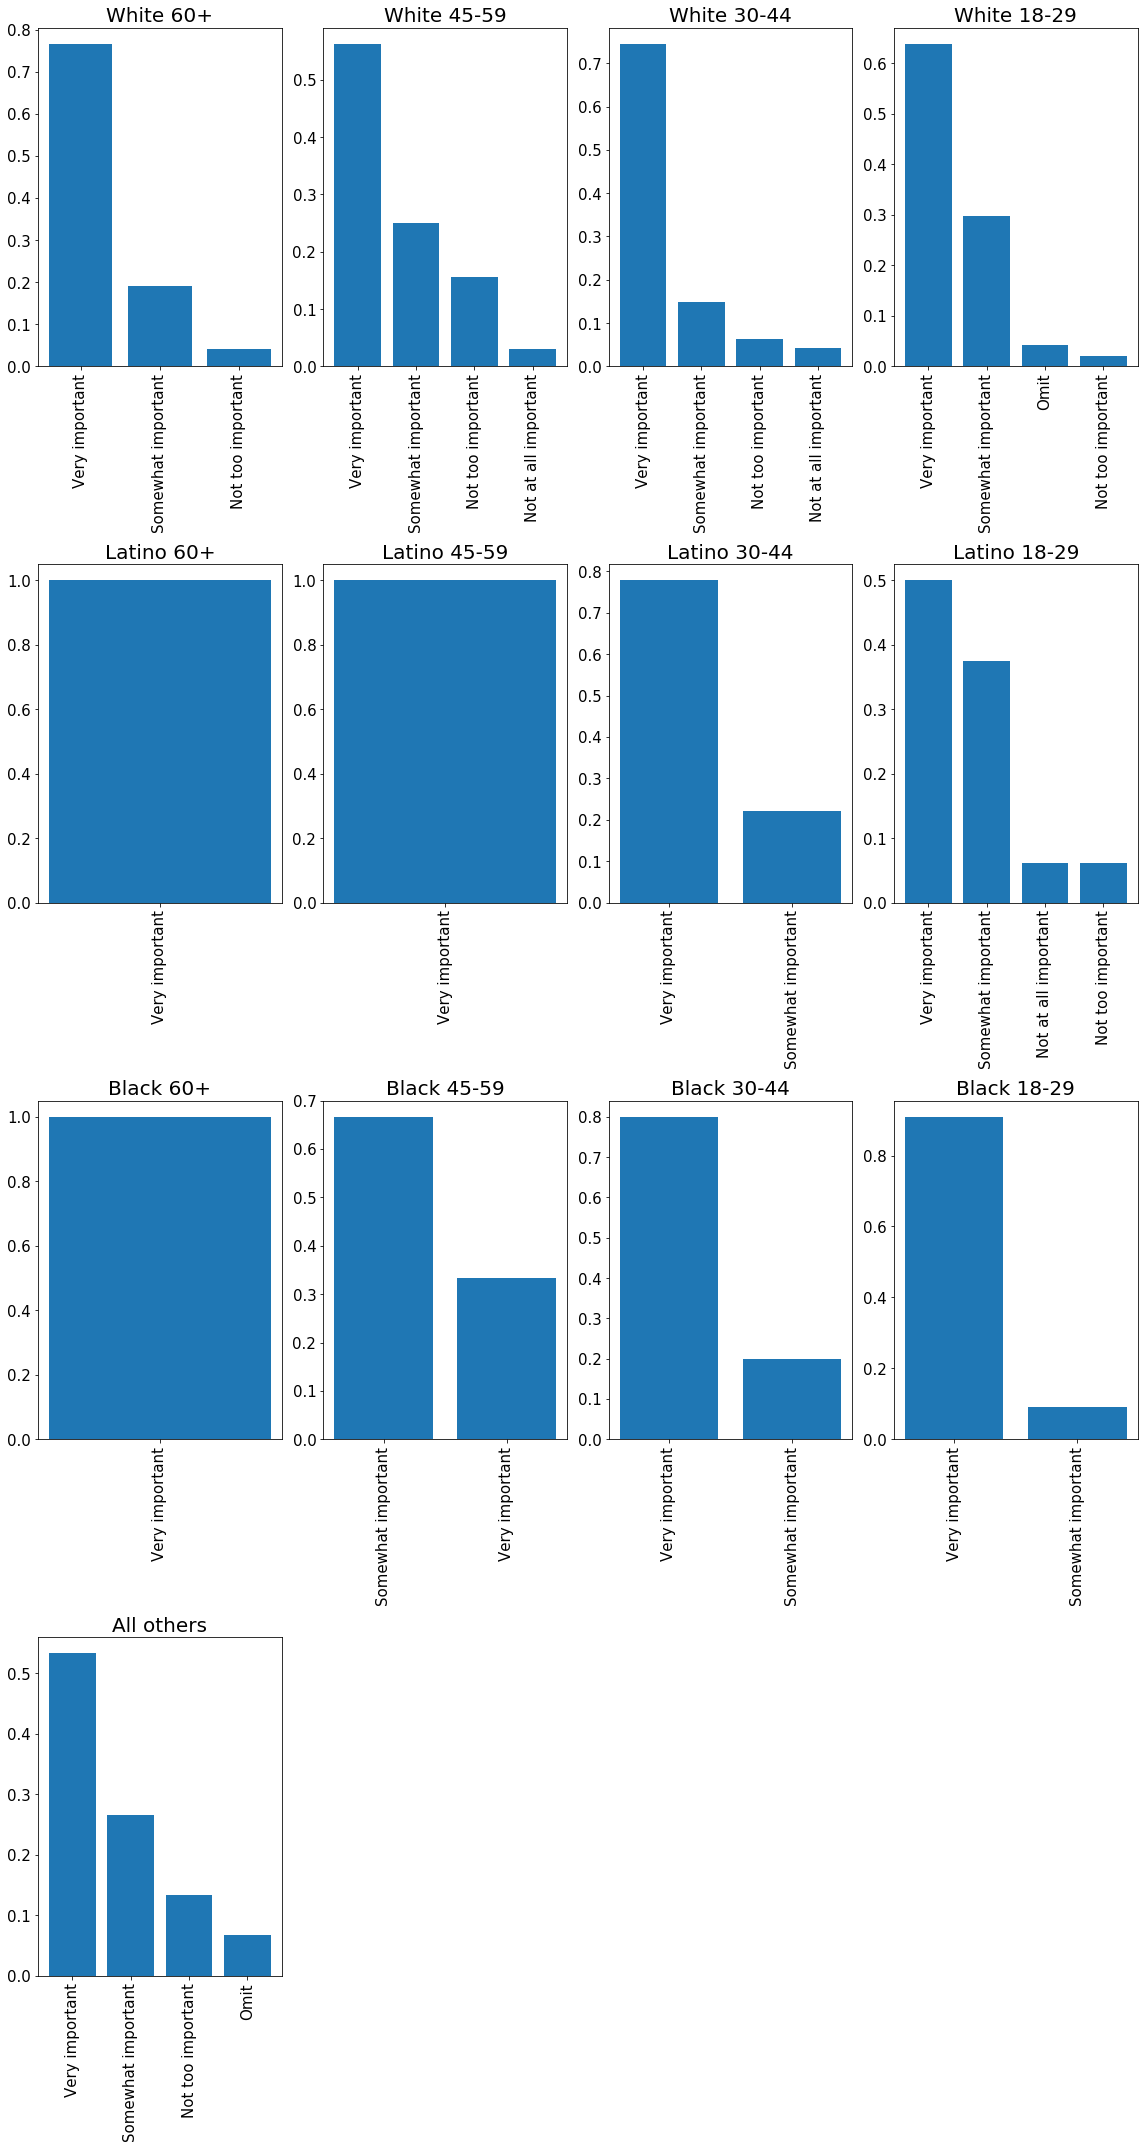

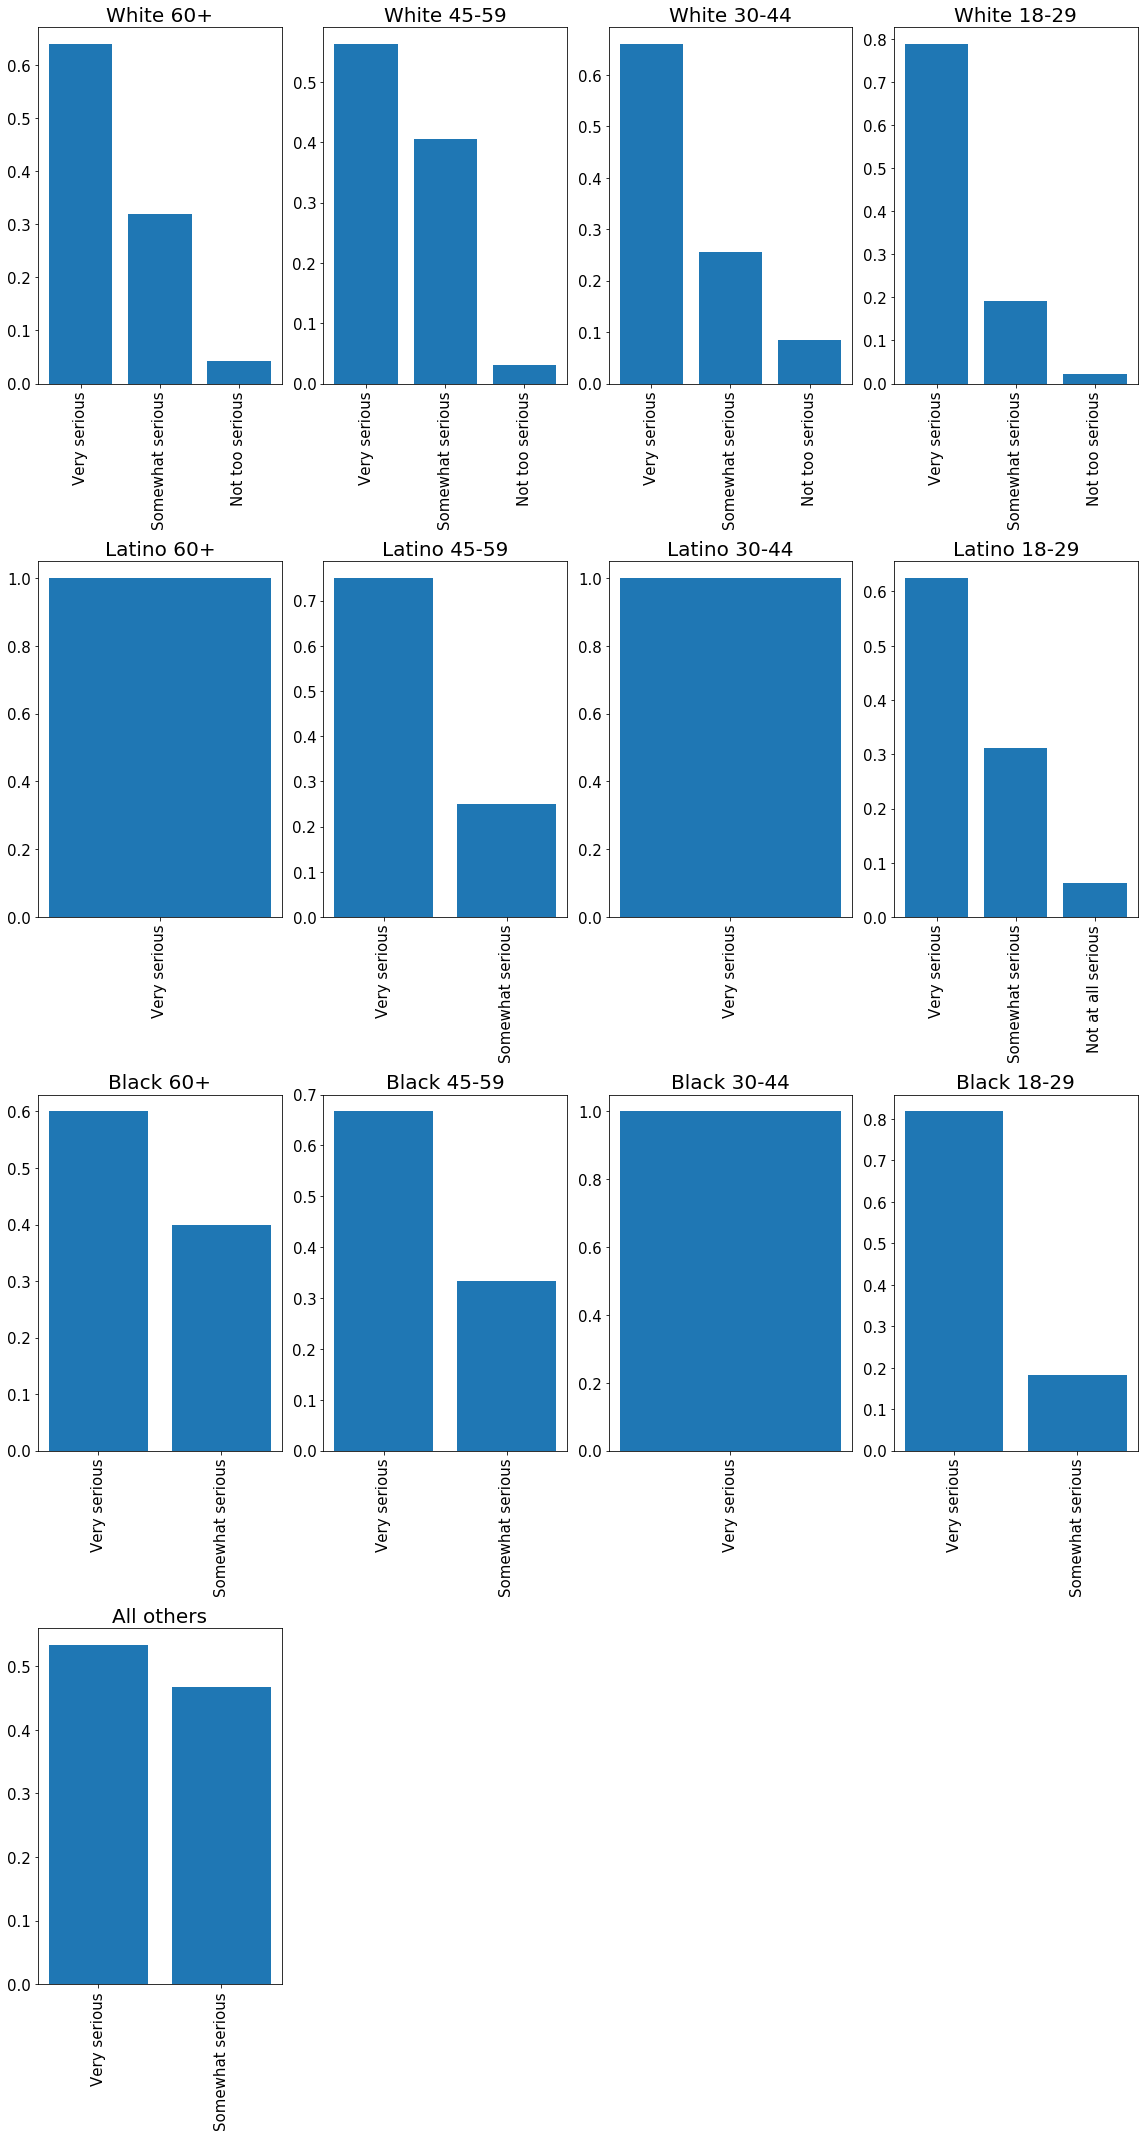

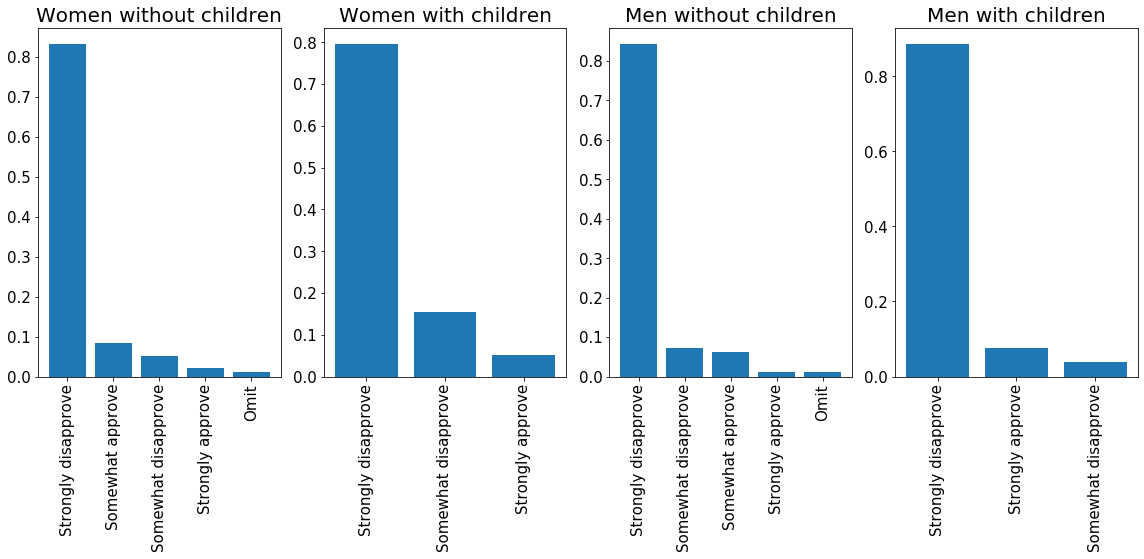

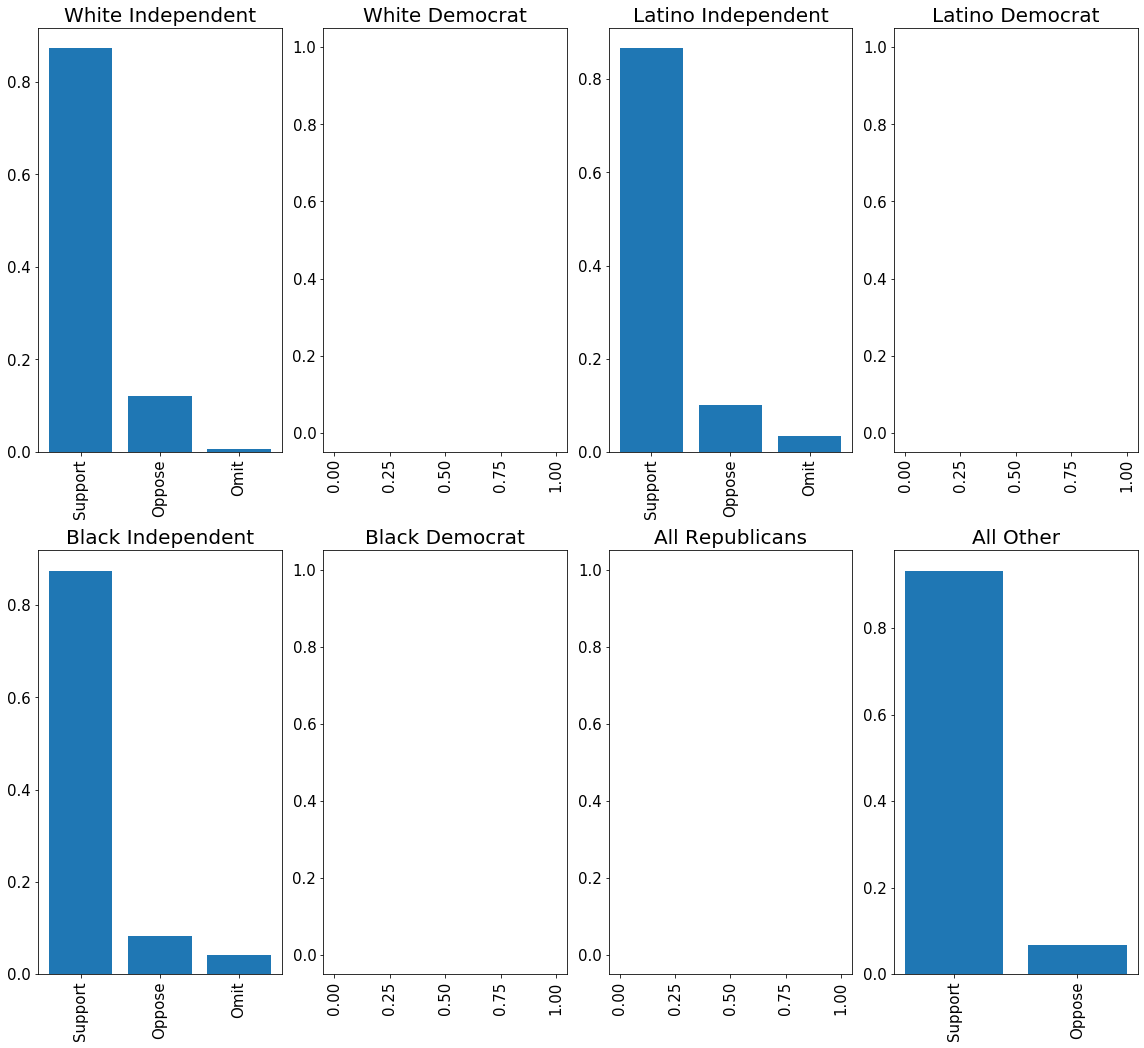

In [27]:
chart_simplifier(df_v3_lib_ind, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'WOMEN' )
chart_simplifier(df_v3_lib_ind, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'SEXUALHARASS' )
chart_simplifier(df_v3_lib_ind, group = group_parents, filt = 'PARENTS', issue = 'TRUMP4' )
chart_simplifier(df_v3_lib_ind, group = group_party_by_race, filt = 'PARTYBYRACE', issue = 'GUN16' )


### Conservative Independents 

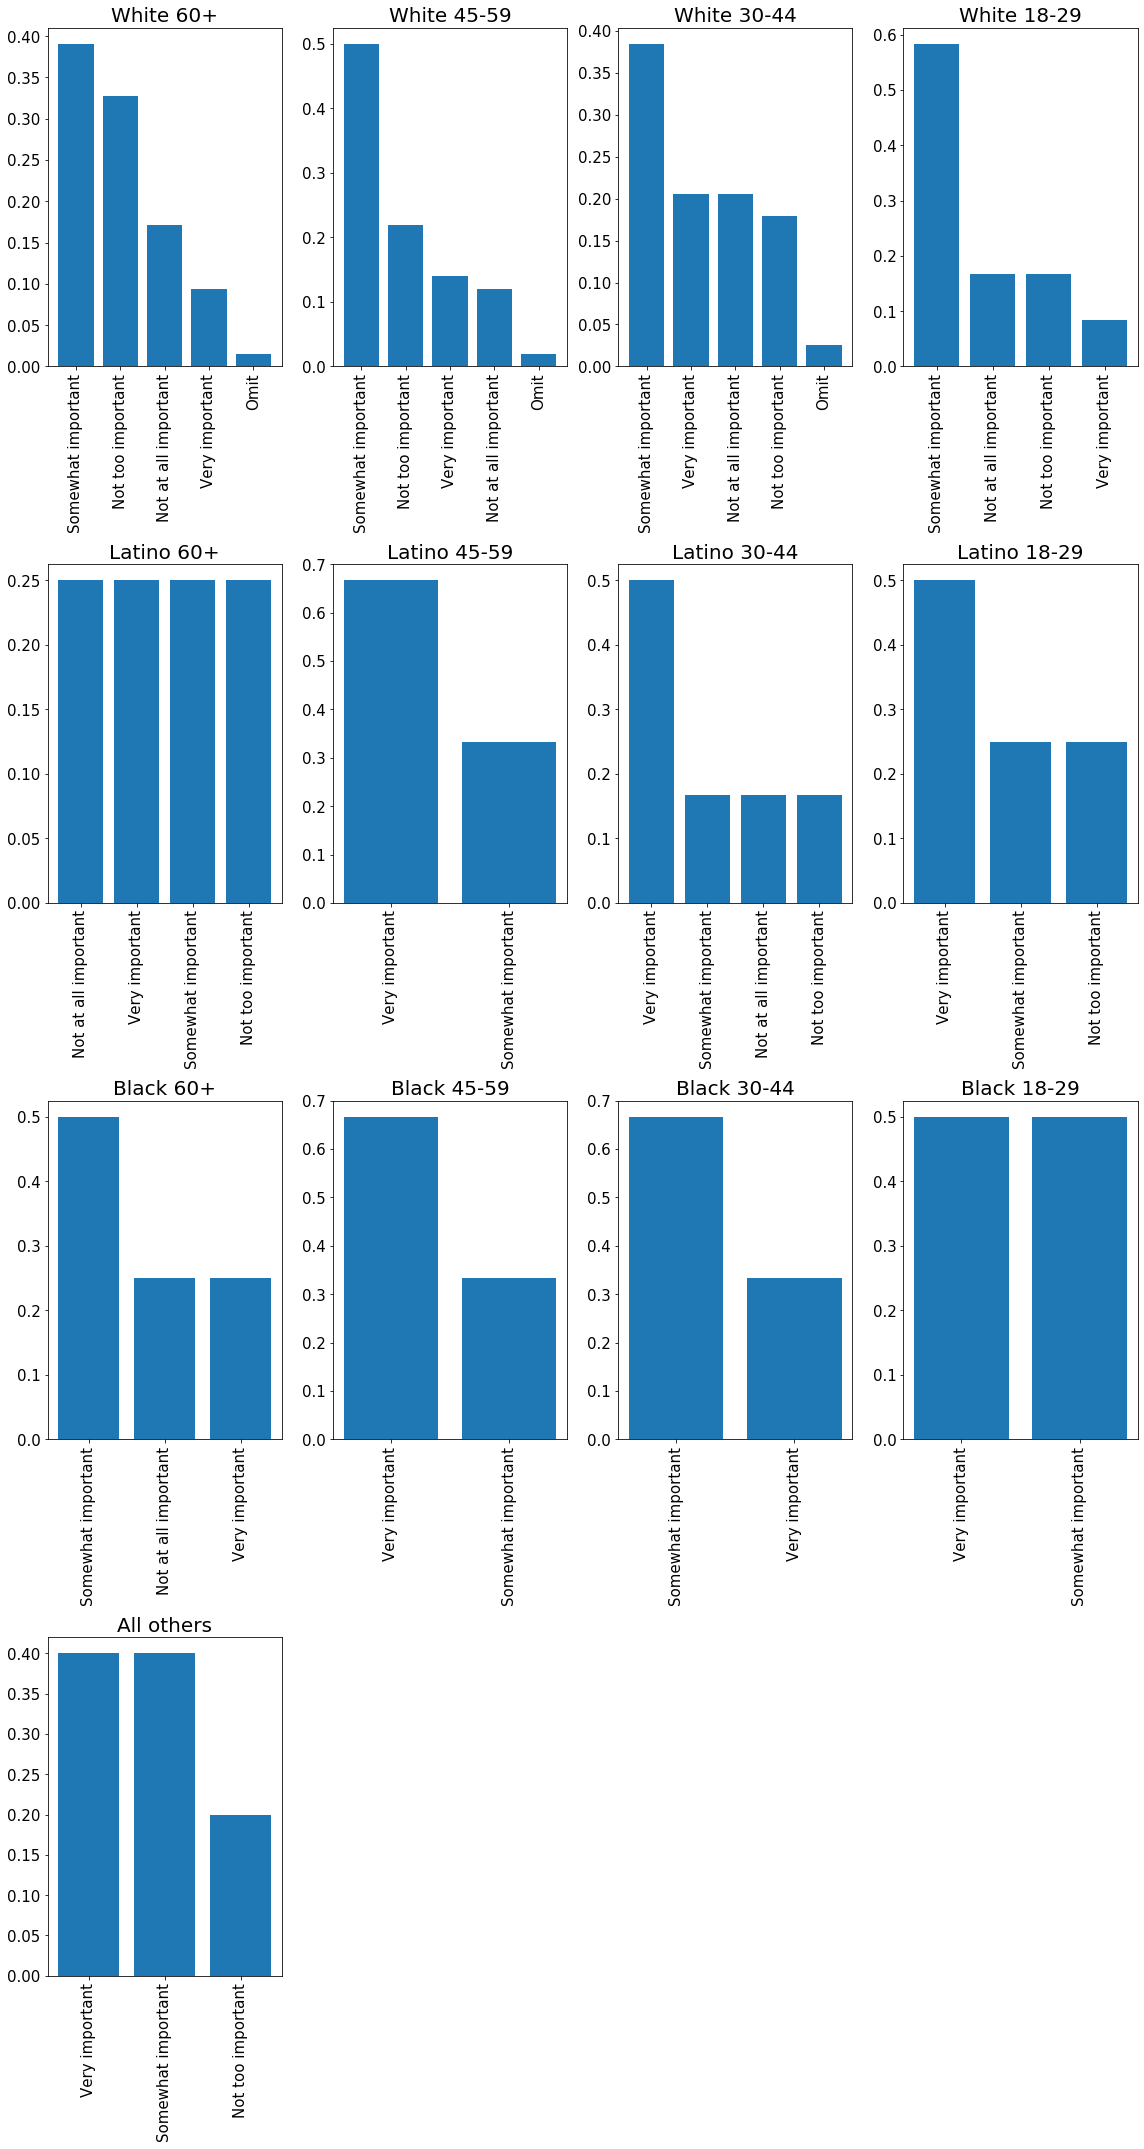

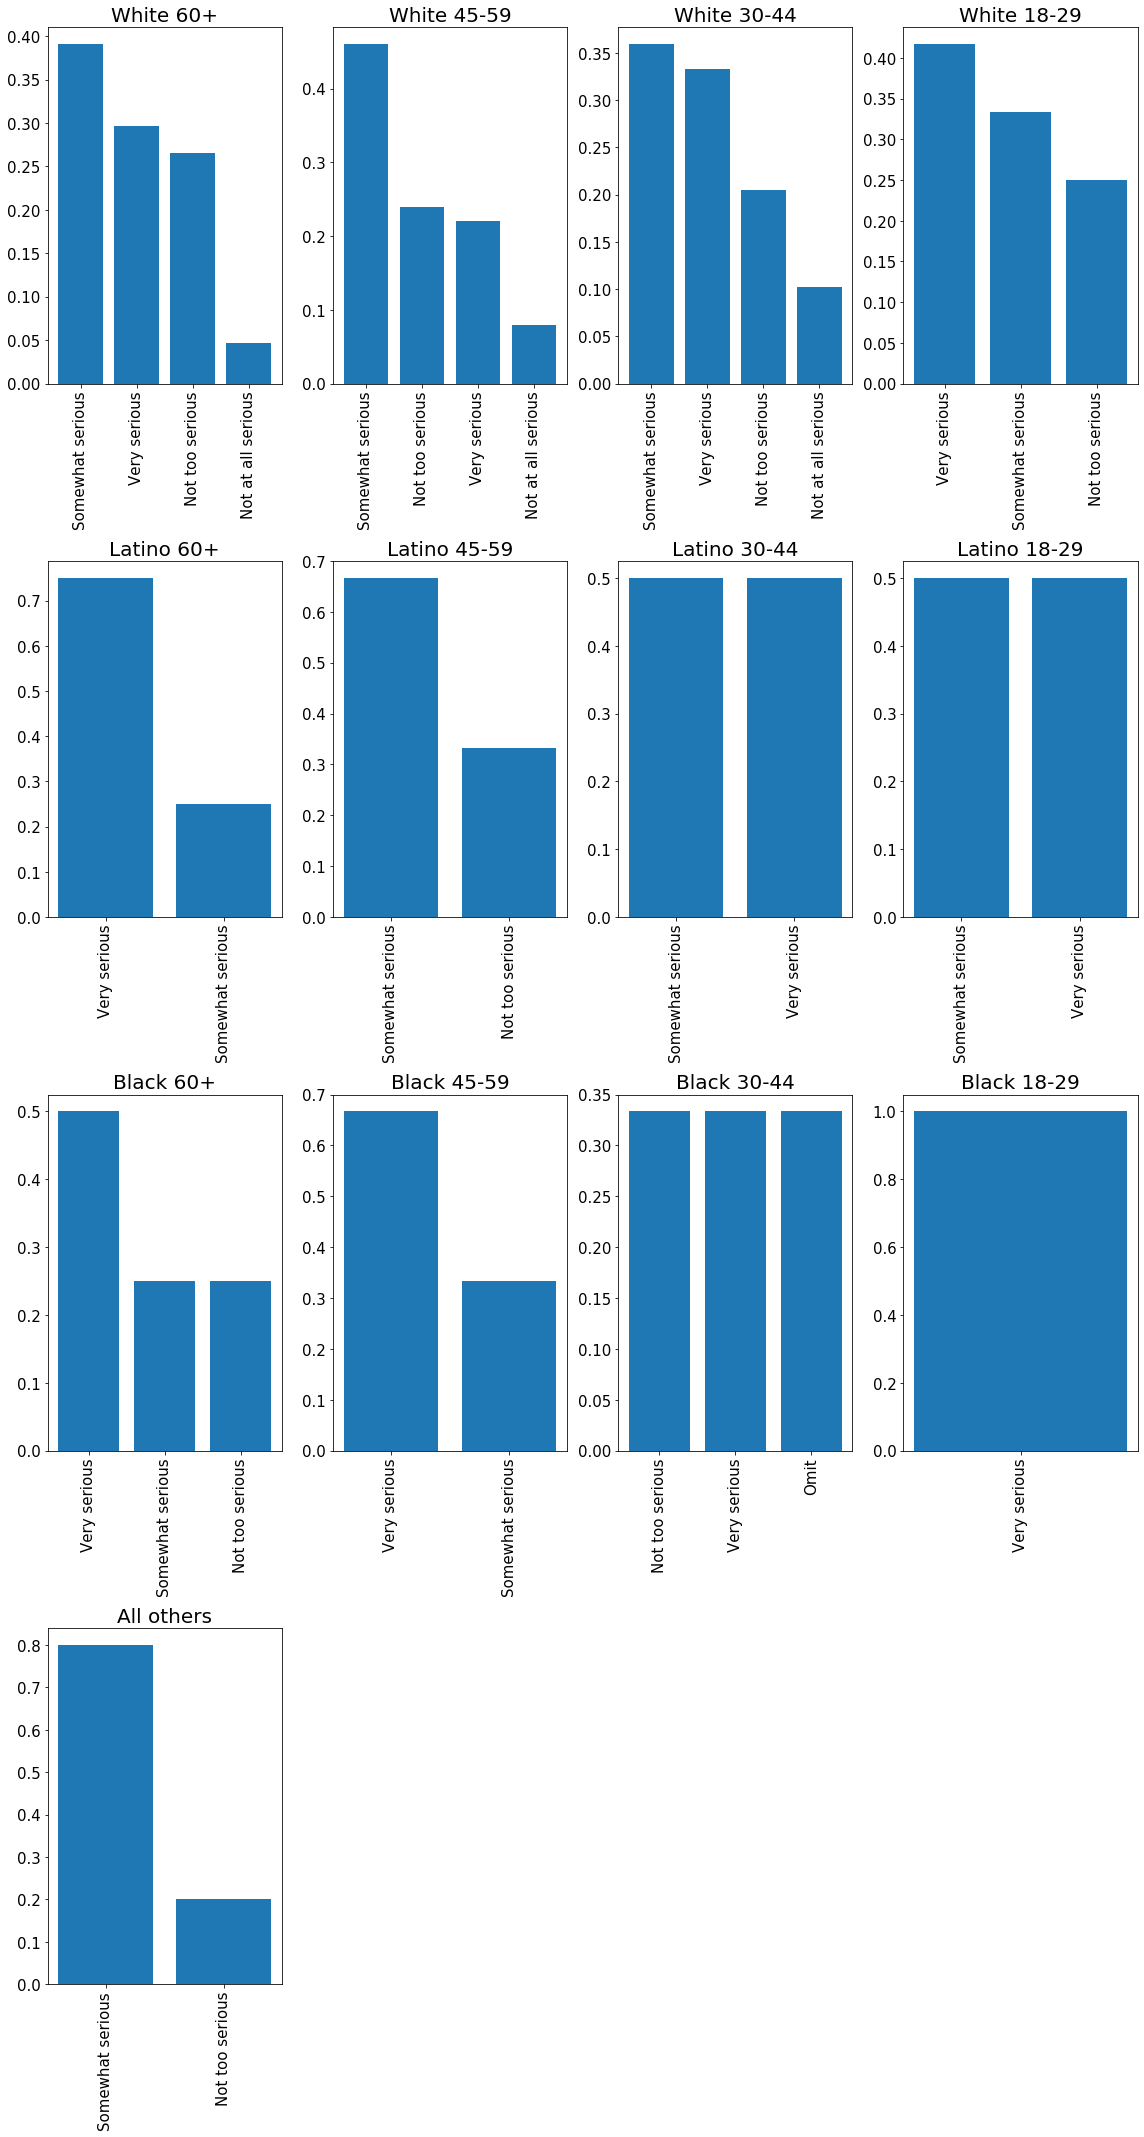

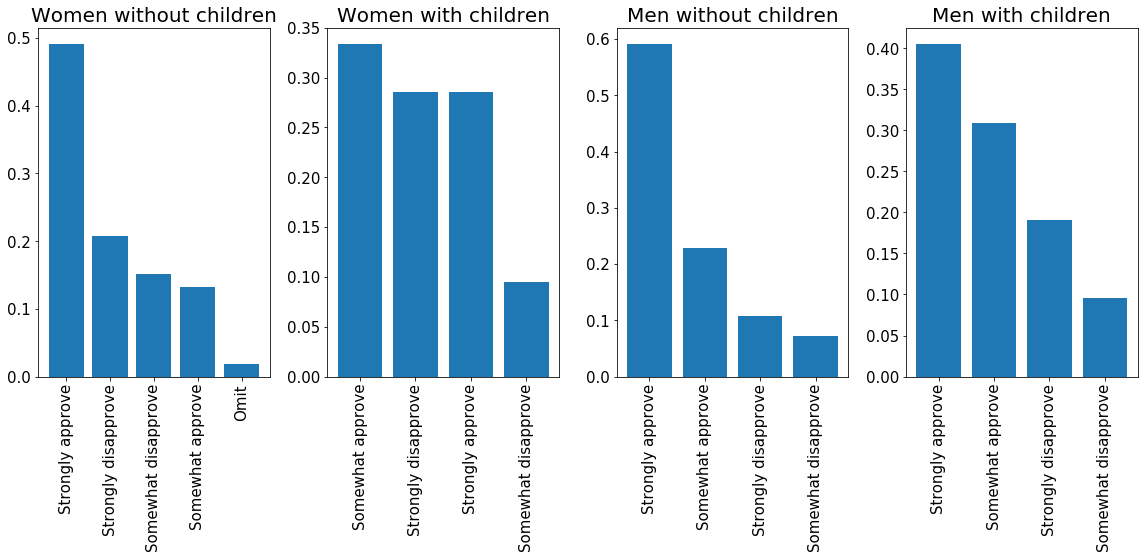

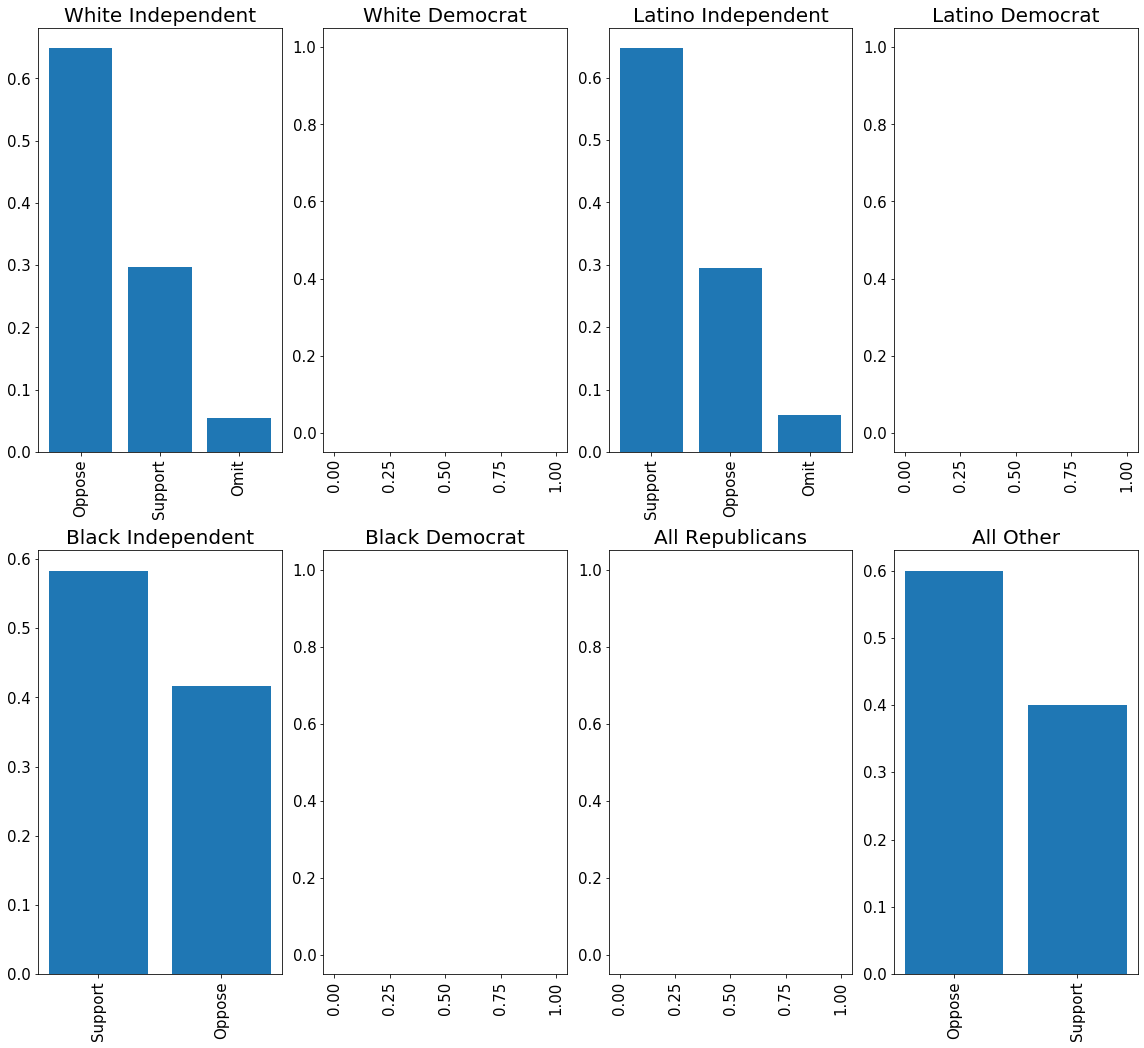

In [28]:
chart_simplifier(df_v3_con_ind, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'WOMEN' )
chart_simplifier(df_v3_con_ind, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'SEXUALHARASS' )
chart_simplifier(df_v3_con_ind, group = group_parents, filt = 'PARENTS', issue = 'TRUMP4' )
chart_simplifier(df_v3_con_ind, group = group_party_by_race, filt = 'PARTYBYRACE', issue = 'GUN16' )


### All Independents 


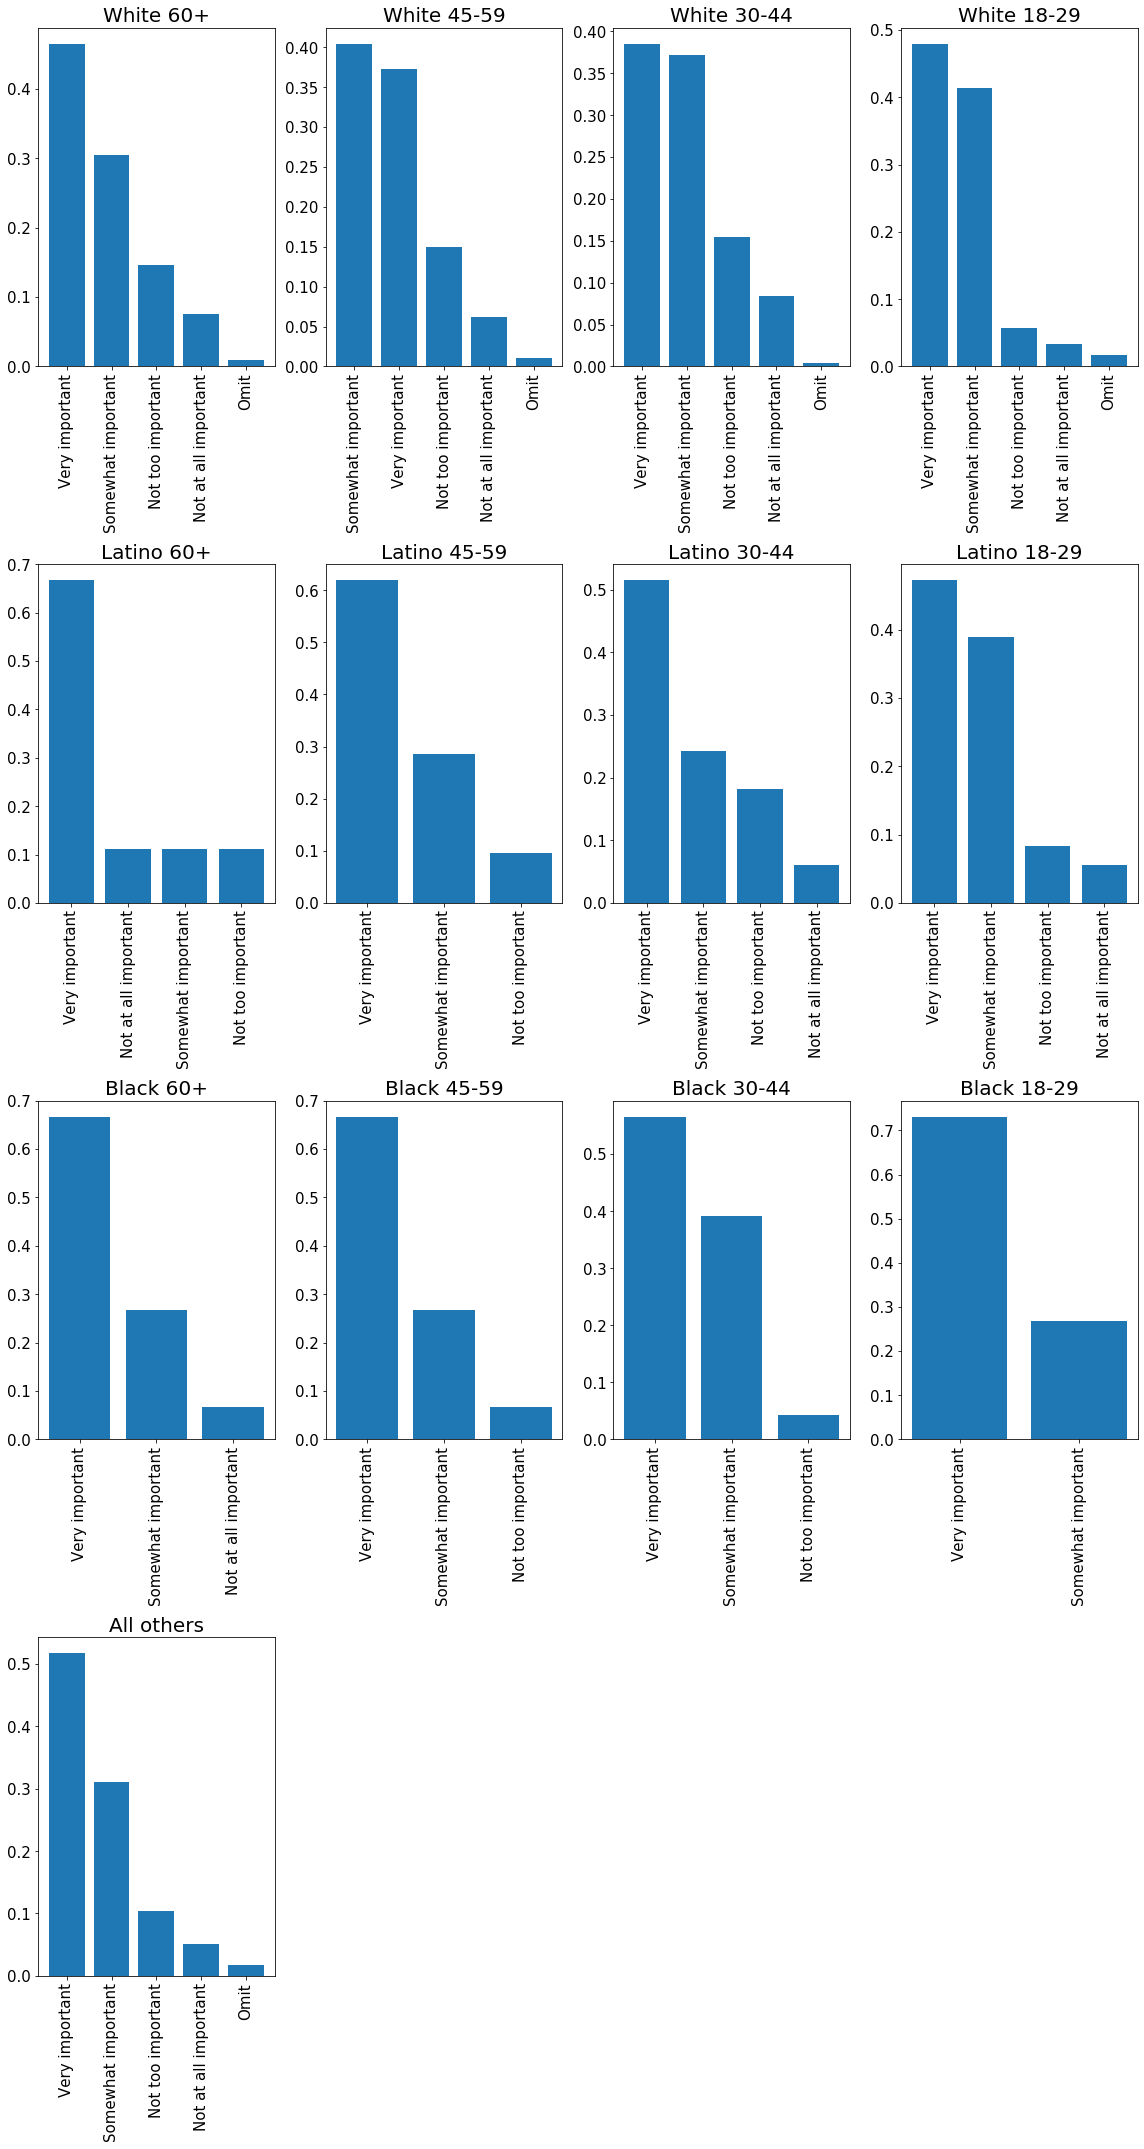

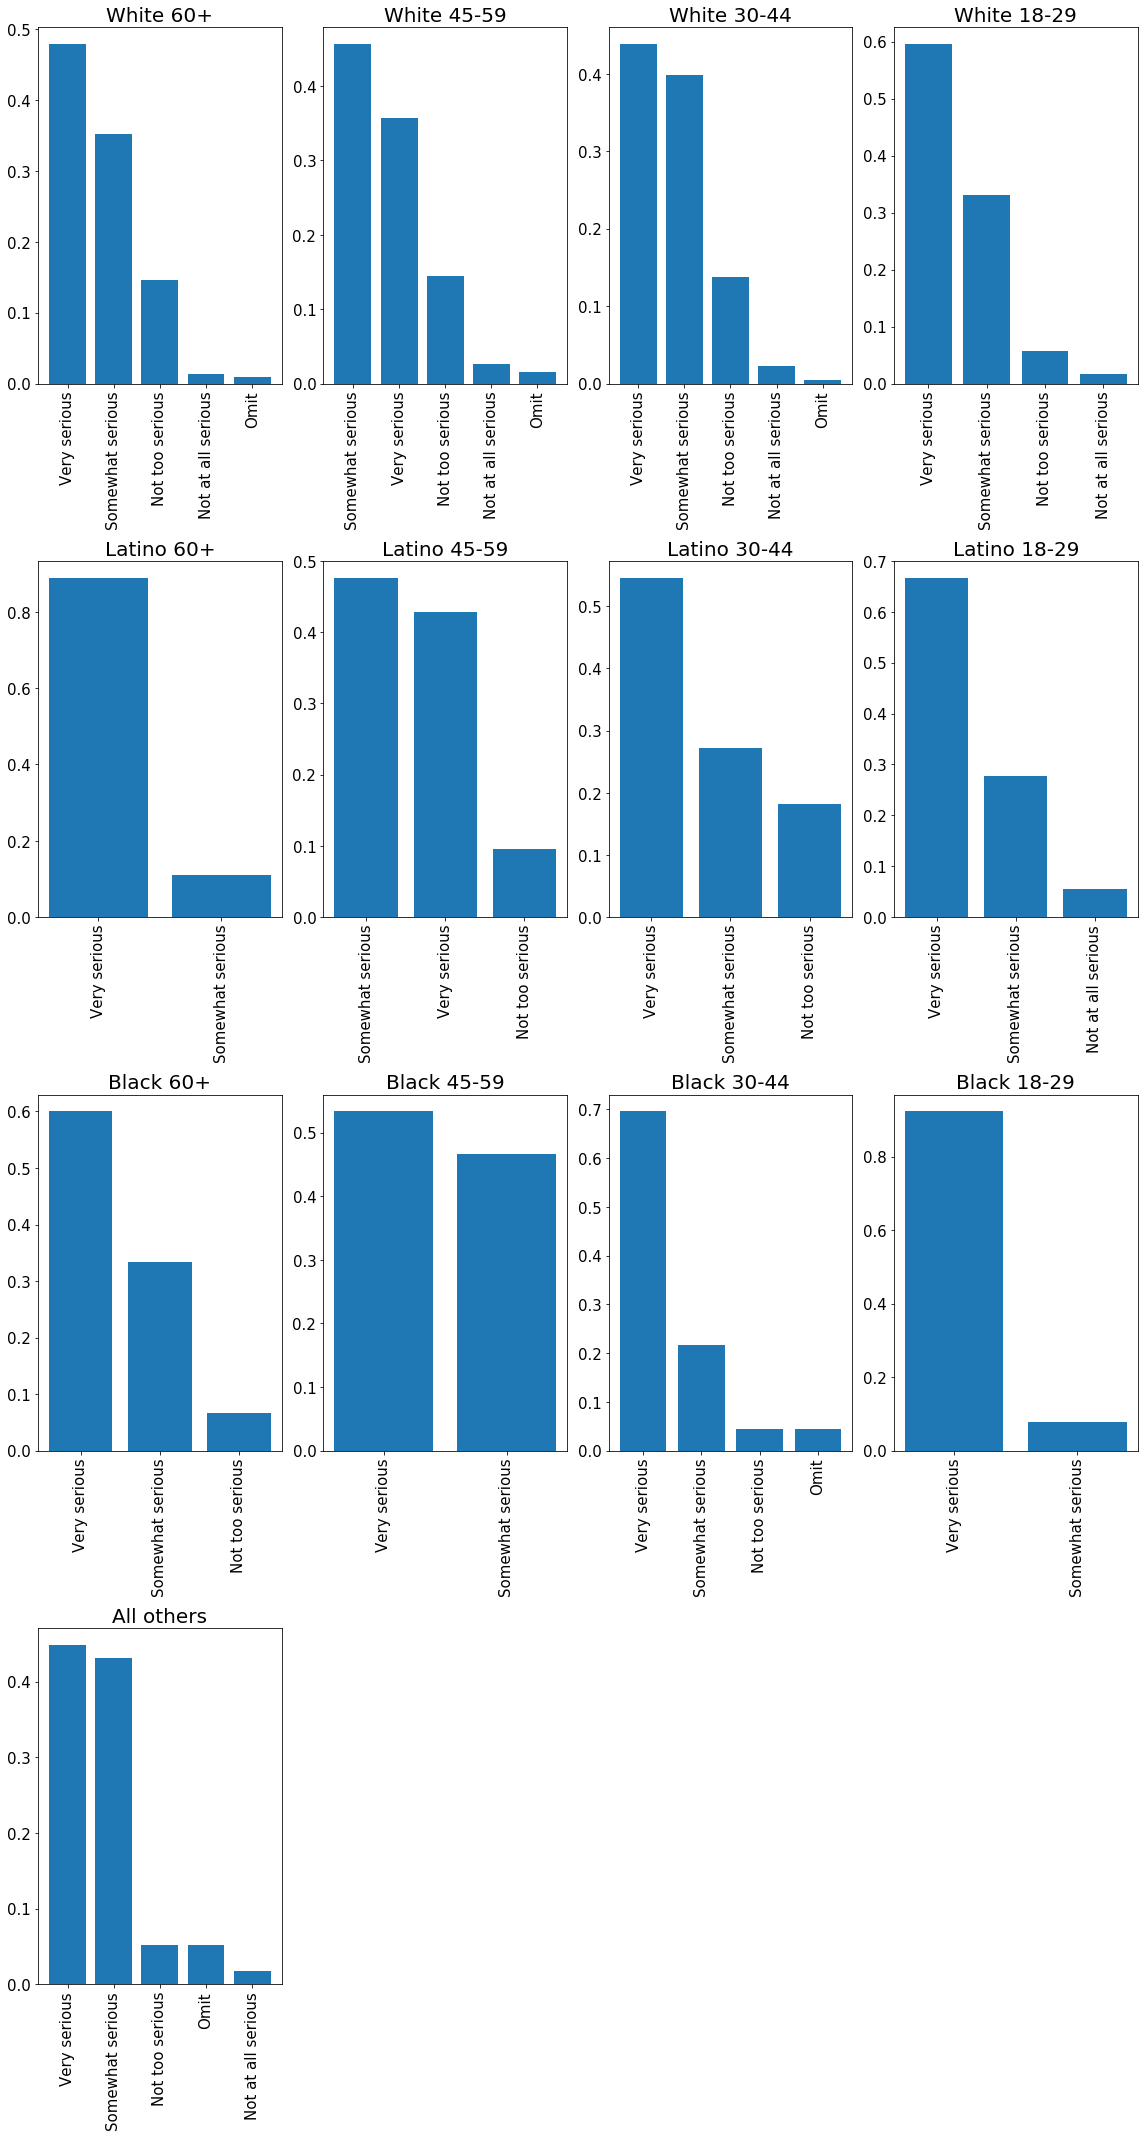

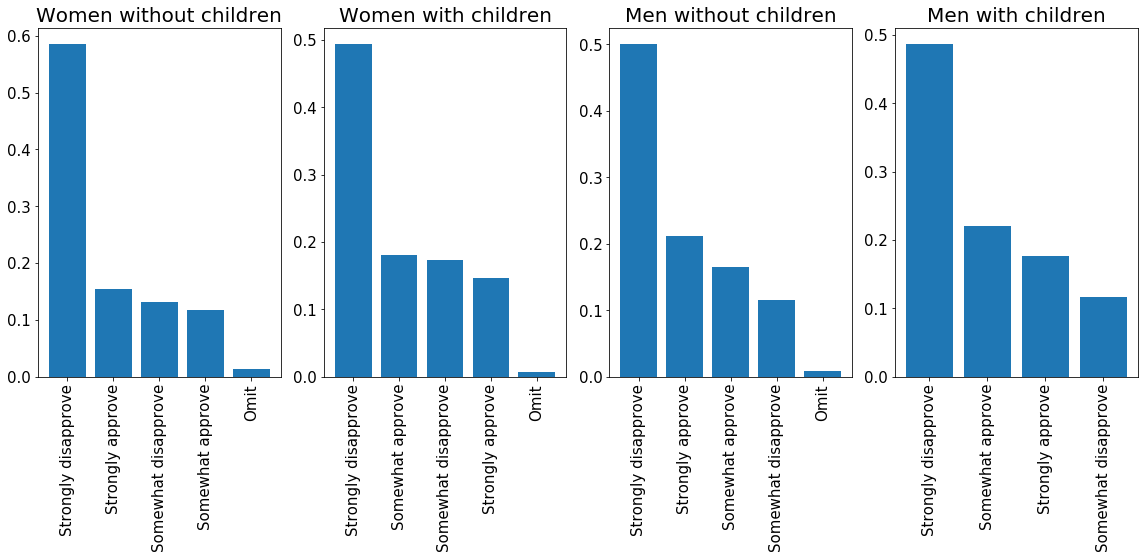

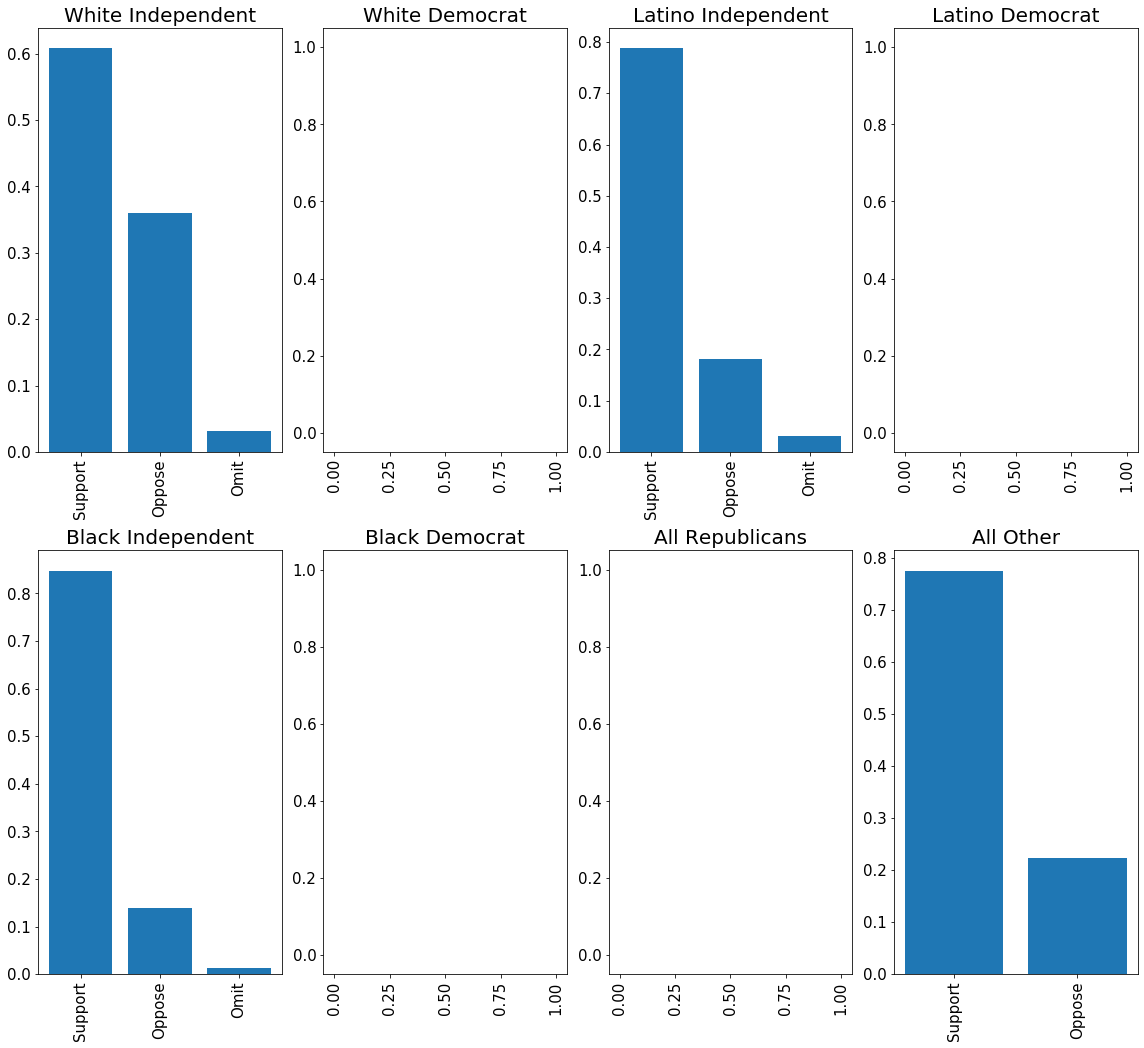

In [29]:
chart_simplifier(df_v3_all_ind, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'WOMEN' )
chart_simplifier(df_v3_all_ind, group = group_age_by_race, filt = 'AGEBYRACE', issue = 'SEXUALHARASS' )
chart_simplifier(df_v3_all_ind, group = group_parents, filt = 'PARENTS', issue = 'TRUMP4' )
chart_simplifier(df_v3_all_ind, group = group_party_by_race, filt = 'PARTYBYRACE', issue = 'GUN16' )
